In [1]:
#Hier weren die Daten geladen

import numpy as np
import os

#Directory an dem die Daten sind
directory = "/home/jovyan/Praktikum_P2/232_Gleichströme" #Directory

#Directory Festlegen und anzeigen
os.chdir(directory) #geht ins gewünschte Directory
directory_path = os.getcwd() #Derzeitiges Directory
print("My current directory is : " + directory_path)
folder_name = os.path.basename(directory_path) #Derzeitiger Ordner
print("My directory name is : " + folder_name)

My current directory is : /home/jovyan/Praktikum_P2/232_Gleichströme
My directory name is : 232_Gleichströme


In [2]:
#232_a
print(f'{"232_a)":#^50}')

Messdaten = "232a.txt" #Dateiname

#Daten Laden und ausgeben
data = np.loadtxt(Messdaten)
print(data) 

#Spalten der Datei auslesen
columb1 = data[:,0] #1.Spalte
columb2 = data[:,1] #2.Spalte
columb3 = data[:,2] #3.Spalte

#definiere N als Anzahl der Messwertpaare
N=len(columb1)
print("N:", N)

######################232_a)######################
[[  0.55   8.5  100.  ]
 [  0.6    9.5   90.  ]
 [  0.7   10.    80.  ]
 [  0.75  10.5   70.  ]
 [  0.8   11.5   60.  ]
 [  0.9   13.5   50.  ]
 [  1.    16.    40.  ]
 [  1.1   18.    30.  ]
 [  1.25  21.5   20.  ]]
N: 9


In [3]:
#Hier werden die Werte für die Aufgabe berechnet

import numpy as np

#################### gemessene Werte ####################
print(f'{"Gemessene Werte":#^50}')

U = columb1
print("Spannung U in V:", U)
I = columb2/1000 #Umrechnung von mA in A
print("Stromstärke I in A:", I)
R = columb3
print("Widerstand R in Ohm:", R)

#################### gemessene Fehler ####################
print(f'{"gemessene Fehler":#^50}')

U_err = np.array([0.05]*N) #in V
print("Fehler auf U:", U_err)
I_err = np.array([0.5/1000]*N)#Umrechnung von mA in A
print("Fehler auf I:", I_err)
R_err = np.array([1]*N) #in Ohm
print("Fehler auf R:", R_err)

#################Gemessene Werte##################
Spannung U in V: [0.55 0.6  0.7  0.75 0.8  0.9  1.   1.1  1.25]
Stromstärke I in A: [0.0085 0.0095 0.01   0.0105 0.0115 0.0135 0.016  0.018  0.0215]
Widerstand R in Ohm: [100.  90.  80.  70.  60.  50.  40.  30.  20.]
#################gemessene Fehler#################
Fehler auf U: [0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05]
Fehler auf I: [0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005]
Fehler auf R: [1 1 1 1 1 1 1 1 1]


x_data: [0.0085 0.0095 0.01   0.0105 0.0115 0.0135 0.016  0.018  0.0215]
y_data: [0.55 0.6  0.7  0.75 0.8  0.9  1.   1.1  1.25]
x_err: [0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005]
y_err: [0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05]
Anzahl der Wertepaare N: 9
Dies ist die Steigung m:  52.064791740833044
Dies ist der y-Achsenabschnitt n:  0.16158775364898526
Dies ist die Varianz auf m (V[m]):  9.011213955144177
Dies ist die Varianz auf n (V[n]):  0.001731654948380206
Dies ist die Kovarianz von m und n (Vmn):  -0.11914827340690634
Wir erhalten die Güte als:  0.019955945176219268


<Figure size 360x360 with 0 Axes>

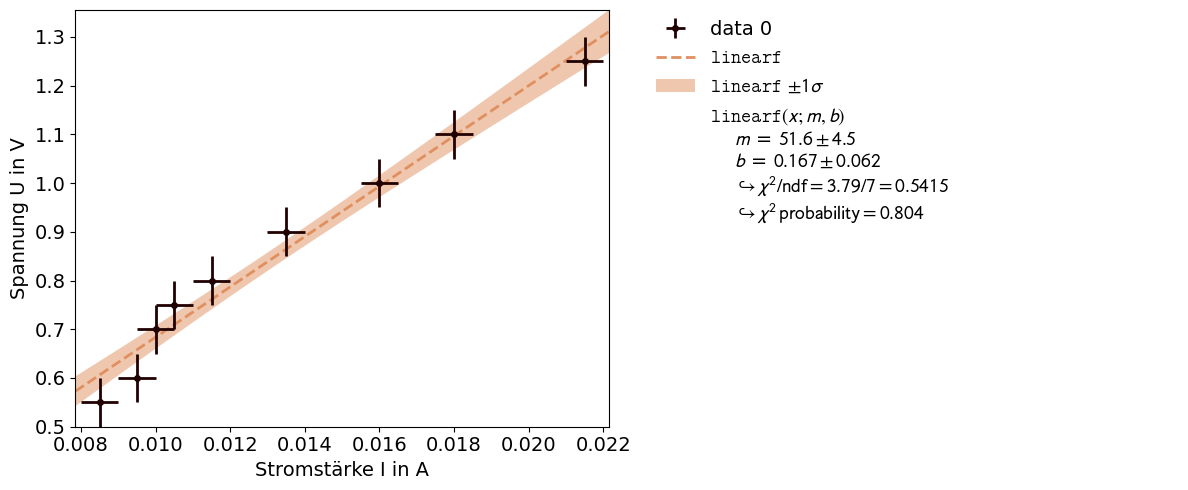

[[ 1.99977947e+01 -2.64411490e-01]
 [-2.64411490e-01  3.84789079e-03]]


In [4]:
#Hier wird der Geraden-Fit berechneet und geplottet

#################### Werte für den Fit ####################
#print(f'{"Werte für den Fit":#^50}')

x_data = I
print("x_data:", x_data)
y_data = U
print("y_data:", y_data)


#Fehler für den Fit
x_err = I_err
print("x_err:", x_err)
y_err = U_err
print("y_err:", y_err)


from kafe2 import XYContainer, Fit, Plot
import matplotlib.pyplot as plt
import numpy as np

#N = Anzahl der Wertepaare
print("Anzahl der Wertepaare N:" , N)

#Umbenennen der Variablen
x = x_data
y = y_data
# Fehler x_err und y_err werden aus der vorherigen zelle übernommen

#Bildung der Varianzgewichteten Mittelwerte z ∈ {x, y, xy, x^2}

#Bildung von Zähler und Nenner der Rechnungen z/y_err**2
sumyerr  = sum(1/(y_err)**2)
#print("Dies ist der Nenner der Mittelwerte:", sumyerr)
xdivyerr = sum(x/(y_err)**2)
#print("Dies ist der Zähler des x-Mittelwert:", xdivyerr)
ydivyerr = sum(y/(y_err)**2)
#print("Dies ist der Zähler des y-Mittelwert:", ydivyerr)
x2divyerr = sum((x**2)/(y_err)**2)
#print("Dies ist der Zähler des x^2-Mittelwert:", x2divyerr)
xydivyerr = sum((x*y)/(y_err)**2)
#print("Dies ist der Zähler des xy-Mittelwert:", xydivyerr)

#Bildung der Varianzgewichteten Mittelwerte
xMittel = xdivyerr/sumyerr
#print("Dies ist der varianzgewichteter Mittelwert von X: ",xMittel)
yMittel = ydivyerr/sumyerr
#print("Dies ist der varianzgewichteter Mittelwert von Y: ",yMittel)
x2Mittel = x2divyerr/sumyerr
#print("Dies ist der Mittelwert von X^2: ",x2Mittel)
xyMittel = xydivyerr/sumyerr
#print("Dies ist der Mittelwert von XY: ",xyMittel)


#Berechnung von m und n:
m = (xyMittel-(xMittel*yMittel))/(x2Mittel-(xMittel)**2) #Steigung m
print("Dies ist die Steigung m: ",m)
n = yMittel - m*xMittel #Achsenabschnitt n
print("Dies ist der y-Achsenabschnitt n: ",n)

#Berechnung von den Varianzen:
sigmayMittel = N/sumyerr #Varianzgewichtete Standardabweichung Sigmay
#print("Dies ist die Varianzgemittelte Standardabweichung Sigmay: ", sigmayMittel)
Vm = sigmayMittel/(16*(x2Mittel-(xMittel)**2)) #Varianz der Steigung
print("Dies ist die Varianz auf m (V[m]): ",Vm)
Vn = x2Mittel*Vm #Varianz des Achsenabschnitt
print("Dies ist die Varianz auf n (V[n]): ",Vn)
Vmn = -Vm * xMittel #Kovarianz von m und n
print("Dies ist die Kovarianz von m und n (Vmn): ",Vmn)

#Berechnung der Güte:
xi2array = (y-m*x-n)**2/y_err #
xi2 = sum(xi2array)
#print("Dies ist der xi^2-Wert des Fits: ",xi2)
güte = xi2/(14-2) #Güte
print("Wir erhalten die Güte als: ", güte)

def linearf(x, m, b):#lineare Funktion definieren
    return m*x+b
def linfit(x_data, y_data, x_err, y_err): #funktion mit den daten als argumenten erstellen
    xy_data = XYContainer(x_data, y_data) # behälter für x und y erstellen
    
    xy_data.add_error(axis='x', err_val=x_err) #x-Fehlerbalken
    xy_data.add_error(axis='y', err_val=y_err) #y-Fehlerbalken
    xy_data.axis_labels = ("Stromstärke I in A", "Spannung U in V", "Stromstärke I in A")
    
    linear_fit = Fit(data=xy_data, model_function=linearf) #Objekt mit dem xy- Behälter und der linearen Funktion erzeugen
    fit_results = linear_fit.do_fit() #Ergebnisse bestimmen und später ausgeben lassen
    
    #linear_fit.report()
    
    plt.figure(figsize=(5,5)) #Größe des Bildes ändern
    plot = Plot(fit_objects=linear_fit) 
    plot.plot()
    
    #plot als jpg abspeichern und anzeigen
    plt.savefig('232a.jpg', dpi = 500)
    plt.show() #Plot anzeigen
    return fit_results

#Ergebnisse in der Kovarianzmatrix ausgeben lassen
print(linfit(x_data, y_data, x_err, y_err)['parameter_cov_mat'])

In [5]:
print("Der effiktiver Widerstand R_A in Ohm:", m)
print("Fehler auf R_A in Ohm:", Vm)

Der effiktiver Widerstand R_A in Ohm: 52.064791740833044
Fehler auf R_A in Ohm: 9.011213955144177


In [6]:
#232_b
print(f'{"232_b)":#^50}')

#################### Werte berechnen ####################
print(f'{"Werte berechnen":#^50}')

R_A = m #Steigung des Geraden-Fits aus der vorherigen Zelle
print("Der effiktiver Widerstand R_A in Ohm:", m)
R_U = 2500 #in Ohm (aus Tabelle)
print("Widerstand R_U des Mavometers(zur Spannungsmessung) in Ohm:", R_U)

R_x = abs((R_A*R_U)/(R_A-R_U))
print("Widerstand R_x in Ohm:",R_x)

#Fehlerrechnung
R_A_err = Vm #vom Fit aus der vorherigen Zelle
print("Fehler auf R_A in Ohm:", Vm)
R_U_err = 0 #in Ohm, 0, da umgeformt aus Anleitung
print("Fehler auf R_U in Ohm:", R_U_err)

s1 = (-R_U**2/(R_A-R_U)**2)*R_A_err
s2 = (R_A**2/(R_A-R_U)**2)*R_U_err
R_x_err = abs((s1**2+s2**2)**(1/2))
print("Fehler auf den Widerstand R_x in Ohm:",R_x_err)

######################232_b)######################
#################Werte berechnen##################
Der effiktiver Widerstand R_A in Ohm: 52.064791740833044
Widerstand R_U des Mavometers(zur Spannungsmessung) in Ohm: 2500
Widerstand R_x in Ohm: 53.17215051808763
Fehler auf R_A in Ohm: 9.011213955144177
Fehler auf R_U in Ohm: 0
Fehler auf den Widerstand R_x in Ohm: 9.398606807487958


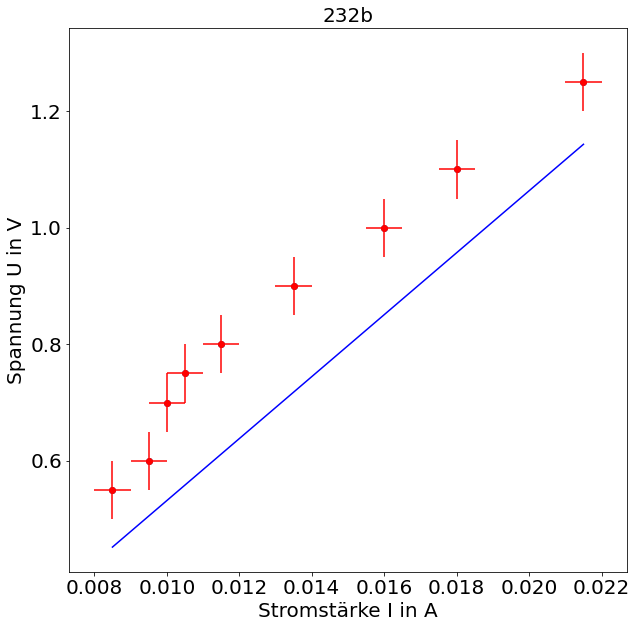

In [7]:
#Hier wird der Plot erstellt

from kafe2 import XYContainer, Fit, Plot
import matplotlib.pyplot as plt
import numpy as np

plt.rc ('font', size = 20) # steuert die Standardtextgröße
plt.rc ('axes', titlesize = 20) # Schriftgröße des Titels
plt.rc ('axes', labelsize = 20) # Schriftgröße der x- und y-Beschriftungen
plt.rc ('xtick', labelsize = 20) #Schriftgröße der x-Tick-Labels
plt.rc ('ytick', labelsize = 20) #Schriftgröße der y-Tick-Labels
plt.rc ('legend', fontsize = 20) #Schriftgröße der Legende

#Plot mir Fehlerbalken
plt.figure(figsize = (10,10)) #Größe des Bildes
plt.scatter(I,U) #eigentlicher Plot
plt.plot(I, R_x*I, linestyle='solid', color = "b")

plt.xlabel("Stromstärke I in A") #Achsenbeschriftung x-Achse
plt.ylabel("Spannung U in V") #Achsenbeschriftung y-Achse
plt.title("232b") #Titel des Plots
plt.errorbar(I, U, xerr = I_err, yerr = U_err, fmt = "o", color = "r") #Fehlerbalken, color r = Rot
plt.show #Plot anzeigen
plt.savefig('232b.jpg', dpi = 300) #Plot als jpg-Datei abspeichern

In [8]:
#232_c
print(f'{"232_c)":#^50}')

R_x = 47.4 #in Ohm
print("Widerstand R_x mit dem Multimeter gemessen:", R_x)

R_x_err = 0.1 #in Ohm
print("Der Fehler auf den Widerstand R_x mit dem Multimeter gemessen:", R_x_err)

R_div = R_A - R_x
print("Differenz der Widerstände R_A und R_x in Ohm:", R_div)

######################232_c)######################
Widerstand R_x mit dem Multimeter gemessen: 47.4
Der Fehler auf den Widerstand R_x mit dem Multimeter gemessen: 0.1
Differenz der Widerstände R_A und R_x in Ohm: 4.664791740833046


In [9]:
#232_d Messen für die e)

In [10]:
#232_e
print(f'{"232_e)":#^50}')

Messdaten = "232d.txt" #Dateiname

#Daten Laden und ausgeben
data = np.loadtxt(Messdaten)
print(data) 

#Spalten der Datei auslesen
columb1 = data[:,0] #1.Spalte
columb2 = data[:,1] #2.Spalte
columb3 = data[:,2] #3.Spalte
columb4 = data[:,3] #4.Spalte
columb5 = data[:,4] #5.Spalte

N=len(columb1)
print("N:", N)

######################232_e)######################
[[  6.5    0.6   75.     1.     1.  ]
 [ 13.     0.75  35.     1.     1.  ]
 [ 19.5    0.8   35.     1.     1.  ]
 [ 26.     0.85  30.     1.     1.  ]
 [ 39.     0.88  20.     1.     2.  ]
 [ 52.     0.9   15.     1.     2.  ]
 [ 65.     0.86  12.5    2.     2.  ]
 [ 78.     0.9   10.     2.     2.  ]
 [ 91.     0.9    9.     2.     2.  ]
 [104.     0.9    8.     2.     2.  ]
 [117.     0.92   7.     2.     2.  ]]
N: 11


In [11]:
#Hier werden die Werte für die Aufgabe berechnet

import numpy as np

#################### gemessene Werte ####################
print(f'{"Gemessene Werte":#^50}')

R_L = columb1 #in Ohm
print("Widerstand R_L in Ohm:", R_L)
U_gemes = columb2 #in V
print("Spannung U_gemes in V:", U_gemes)
I_gemes = columb3/1000 #Umrechnung von mA in A
print("Stromstärke I_gemes in A:", I_gemes)

R_1 = 50*(5.3/100)
print("Widerstand R_1 in Ohm:", R_1)
R_2 = 50*(5.3/100)
print("Widerstand R_2 in Ohm:", R_2)

R_U = np.array([6250, 6250, 6250, 6250, 625, 625, 625, 625, 625, 625, 625])
print("Innenwiderstand des Voltmeters R_U in Ohm:", R_U)
R_I = np.array([2500, 2500, 2500, 2500, 2500, 2500, 500, 500, 500, 500, 500])
print("Innenwiderstand des Amperemeters R_I in Ohm:", R_I)
      
U_0 = 1.785 #in V mit Multimeter gemessen
print("U_0: in V", U_0)

#################### gemessene Fehler ####################
print(f'{"gemessene Fehler":#^50}')

R_L_err = np.array([3]*N) #in V
print("Fehler auf R_L:", R_L_err)
U_gemes_err = np.array([0.1]*N) #in V
print("Fehler auf U:", U_err)
I_gemes_err = np.array([1/1000]*N) #in A
print("Fehler auf I:", I_err)

R_1_err = 0.1*(5.3/100)
print("Fehler auf R_1 in Ohm:", R_1_err)
R_2_err = 0.1*(5.3/100)
print("Fehler auf R_2 in Ohm:", R_2_err)

R_U_err = np.array([0]*N)
print("Fehler auf R_U in Ohm:", R_U_err)
R_I_err = np.array([0]*N)
print("Fehler auf R_I in Ohm:", R_I_err)

U_0_err =0.01 #in V
print("Fehler auf U_0 in V:", U_0_err)

#################### Werte berechnen ####################
print(f'{"Werte berechnen":#^50}')

I = I_gemes+(U_gemes/R_U)
print("Stromstärke I in A:", I)

U = U_gemes-(R_I*I_gemes)
print("Spannung U in V:", U)

#################### Fehler berechnen ####################
print(f'{"Fehler berechnen":#^50}')

s1 = (U_gemes/R_U)*I_gemes_err
s2 = (1/R_U)*U_gemes_err
s3 = (-U_gemes/R_U**2)*R_U_err
I_err = (s1**2+s2**2+s3**2)**(1/2)
print("Fehler auf I in A:", I_err)

s1 = (1)*U_gemes_err
s2 = (I_gemes)*R_I_err
s3 = (R_I)*I_gemes_err
U_err = (s1**2+s2**2+s3**2)**(1/2)
print("Fehler auf U in V:", U_err)

#################Gemessene Werte##################
Widerstand R_L in Ohm: [  6.5  13.   19.5  26.   39.   52.   65.   78.   91.  104.  117. ]
Spannung U_gemes in V: [0.6  0.75 0.8  0.85 0.88 0.9  0.86 0.9  0.9  0.9  0.92]
Stromstärke I_gemes in A: [0.075  0.035  0.035  0.03   0.02   0.015  0.0125 0.01   0.009  0.008
 0.007 ]
Widerstand R_1 in Ohm: 2.65
Widerstand R_2 in Ohm: 2.65
Innenwiderstand des Voltmeters R_U in Ohm: [6250 6250 6250 6250  625  625  625  625  625  625  625]
Innenwiderstand des Amperemeters R_I in Ohm: [2500 2500 2500 2500 2500 2500  500  500  500  500  500]
U_0: in V 1.785
#################gemessene Fehler#################
Fehler auf R_L: [3 3 3 3 3 3 3 3 3 3 3]
Fehler auf U: [0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05 0.05]
Fehler auf I: [0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005]
Fehler auf R_1 in Ohm: 0.0053
Fehler auf R_2 in Ohm: 0.0053
Fehler auf R_U in Ohm: [0 0 0 0 0 0 0 0 0 0 0]
Fehler auf R_I in Ohm: [0 0 0 0 0 0 0 0 0 0 0]
Fehler auf U_0

x: [0.075  0.035  0.035  0.03   0.02   0.015  0.0125 0.01   0.009  0.008
 0.007 ]
y: [0.6  0.75 0.8  0.85 0.88 0.9  0.86 0.9  0.9  0.9  0.92]
Anzahl der Wertepaare N: 11
x_data: [0.075  0.035  0.035  0.03   0.02   0.015  0.0125 0.01   0.009  0.008
 0.007 ]
y_data: [0.6  0.75 0.8  0.85 0.88 0.9  0.86 0.9  0.9  0.9  0.92]
x_err: [0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001]
y_err: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
Dies ist die Steigung m:  -4.567643346253969
Dies ist der y-Achsenabschnitt n:  0.9483273198467403
Dies ist die Varianz auf m (V[m]):  1.6895477038907072
Dies ist die Varianz auf n (V[n]):  0.0015436706191843256
Dies ist die Kovarianz von m und n (Vmn):  -0.03939718054981513
Wir erhalten die Güte als:  0.004389796807453003


<Figure size 360x360 with 0 Axes>

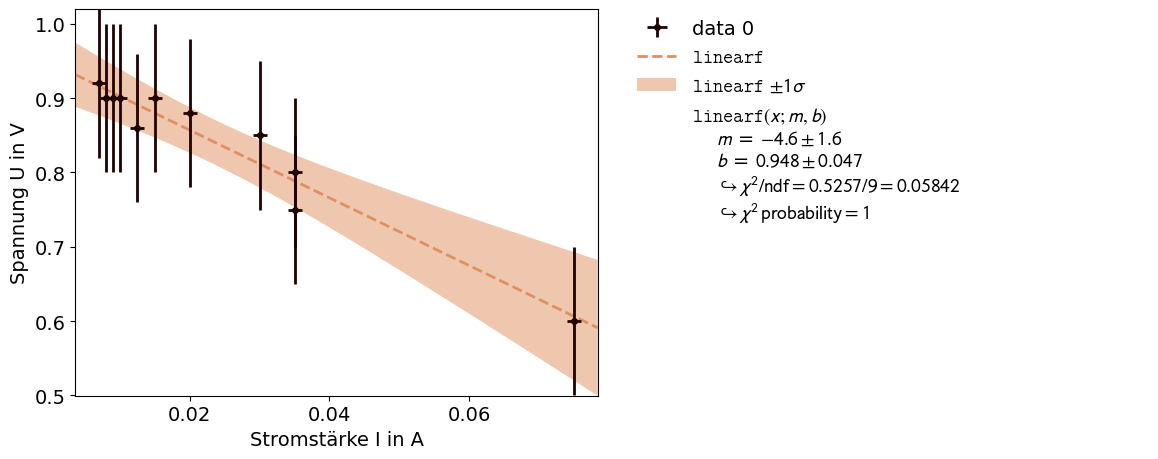

[[ 2.45627992e+00 -5.72760143e-02]
 [-5.72760143e-02  2.24655112e-03]]


In [12]:
#################### Werte für den Fit ####################
#print(f'{"Werte für den Fit":#^50}')

x = I_gemes
print("x:", x)
y = U_gemes
print("y:", y)

N =len(U)
print("Anzahl der Wertepaare N:" , N)

#################### Umbenennen der Variablen ####################
x_data = x
print("x_data:", x_data)
y_data = y
print("y_data:", y_data)
x_err = I_gemes_err
print("x_err:", x_err)
y_err = U_gemes_err
print("y_err:", y_err)

#Hier wird der Geraden-Fit berechneet und geplottet

from kafe2 import XYContainer, Fit, Plot
import matplotlib.pyplot as plt
import numpy as np

#Bildung der Varianzgewichteten Mittelwerte z ∈ {x, y, xy, x^2}

#Bildung von Zähler und Nenner der Rechnungen z/y_err**2
sumyerr  = sum(1/(y_err)**2)
#print("Dies ist der Nenner der Mittelwerte:", sumyerr)
xdivyerr = sum(x/(y_err)**2)
#print("Dies ist der Zähler des x-Mittelwert:", xdivyerr)
ydivyerr = sum(y/(y_err)**2)
#print("Dies ist der Zähler des y-Mittelwert:", ydivyerr)
x2divyerr = sum((x**2)/(y_err)**2)
#print("Dies ist der Zähler des x^2-Mittelwert:", x2divyerr)
xydivyerr = sum((x*y)/(y_err)**2)
#print("Dies ist der Zähler des xy-Mittelwert:", xydivyerr)

#Bildung der Varianzgewichteten Mittelwerte
xMittel = xdivyerr/sumyerr
#print("Dies ist der varianzgewichteter Mittelwert von X: ",xMittel)
yMittel = ydivyerr/sumyerr
#print("Dies ist der varianzgewichteter Mittelwert von Y: ",yMittel)
x2Mittel = x2divyerr/sumyerr
#print("Dies ist der Mittelwert von X^2: ",x2Mittel)
xyMittel = xydivyerr/sumyerr
#print("Dies ist der Mittelwert von XY: ",xyMittel)


#Berechnung von m und n:
m = (xyMittel-(xMittel*yMittel))/(x2Mittel-(xMittel)**2) #Steigung m
print("Dies ist die Steigung m: ",m)
n = yMittel - m*xMittel #Achsenabschnitt n
print("Dies ist der y-Achsenabschnitt n: ",n)

#Berechnung von den Varianzen:
sigmayMittel = N/sumyerr #Varianzgewichtete Standardabweichung Sigmay
#print("Dies ist die Varianzgemittelte Standardabweichung Sigmay: ", sigmayMittel)
Vm = sigmayMittel/(16*(x2Mittel-(xMittel)**2)) #Varianz der Steigung
print("Dies ist die Varianz auf m (V[m]): ",Vm)
Vn = x2Mittel*Vm #Varianz des Achsenabschnitt
print("Dies ist die Varianz auf n (V[n]): ",Vn)
Vmn = -Vm * xMittel #Kovarianz von m und n
print("Dies ist die Kovarianz von m und n (Vmn): ",Vmn)

#Berechnung der Güte:
xi2array = (y-m*x-n)**2/y_err #
xi2 = sum(xi2array)
#print("Dies ist der xi^2-Wert des Fits: ",xi2)
güte = xi2/(14-2) #Güte
print("Wir erhalten die Güte als: ", güte)


def linearf(x, m, b):#lineare Funktion definieren
    return m*x+b
def linfit(x_data, y_data, x_err, y_err): #funktion mit den daten als argumenten erstellen
    xy_data = XYContainer(x_data, y_data) # behälter für x und y erstellen
    
    xy_data.add_error(axis='x', err_val=x_err) #x-Fehlerbalken
    xy_data.add_error(axis='y', err_val=y_err) #y-Fehlerbalken
    xy_data.axis_labels = ("Stromstärke I in A", "Spannung U in V", "Stromstärke I in A")
    
    linear_fit = Fit(data=xy_data, model_function=linearf) #Objekt mit dem xy- Behälter und der linearen Funktion erzeugen
    fit_results = linear_fit.do_fit() #Ergebnisse bestimmen und später ausgeben lassen
    
    #linear_fit.report()
    
    plt.figure(figsize=(5,5)) #Größe des Bildes ändern
    plot = Plot(fit_objects=linear_fit) 
    plot.plot()
    
    #plot als jpg abspeichern und anzeigen
    plt.savefig('232e.jpg', dpi = 500)
    plt.show() #Plot anzeigen
    return fit_results

#Ergebnisse in der Kovarianzmatrix ausgeben lassen
print(linfit(x_data, y_data, x_err, y_err)['parameter_cov_mat'])

x: [0.075096 0.03512  0.035128 0.030136 0.021408 0.01644  0.013876 0.01144
 0.01044  0.00944  0.008472]
y: [-186.9   -86.75  -86.7   -74.15  -49.12  -36.6    -5.39   -4.1    -3.6
   -3.1    -2.58]
Anzahl der Wertepaare N: 11
x_data: [0.075096 0.03512  0.035128 0.030136 0.021408 0.01644  0.013876 0.01144
 0.01044  0.00944  0.008472]
y_data: [-186.9   -86.75  -86.7   -74.15  -49.12  -36.6    -5.39   -4.1    -3.6
   -3.1    -2.58]
x_err: [1.60002880e-05 1.60004500e-05 1.60005120e-05 1.60005780e-05
 1.60006195e-04 1.60006480e-04 1.60005917e-04 1.60006480e-04
 1.60006480e-04 1.60006480e-04 1.60006771e-04]
y_err: [2.5019992  2.5019992  2.5019992  2.5019992  2.5019992  2.5019992
 0.50990195 0.50990195 0.50990195 0.50990195 0.50990195]
Dies ist die Steigung m:  -2871.382543947977
Dies ist der y-Achsenabschnitt n:  26.511842366847922
Dies ist die Varianz auf m (V[m]):  706.1053608911957
Dies ist die Varianz auf n (V[n]):  0.13424544904929925
Dies ist die Kovarianz von m und n (Vmn):  -8.4110978

<Figure size 360x360 with 0 Axes>

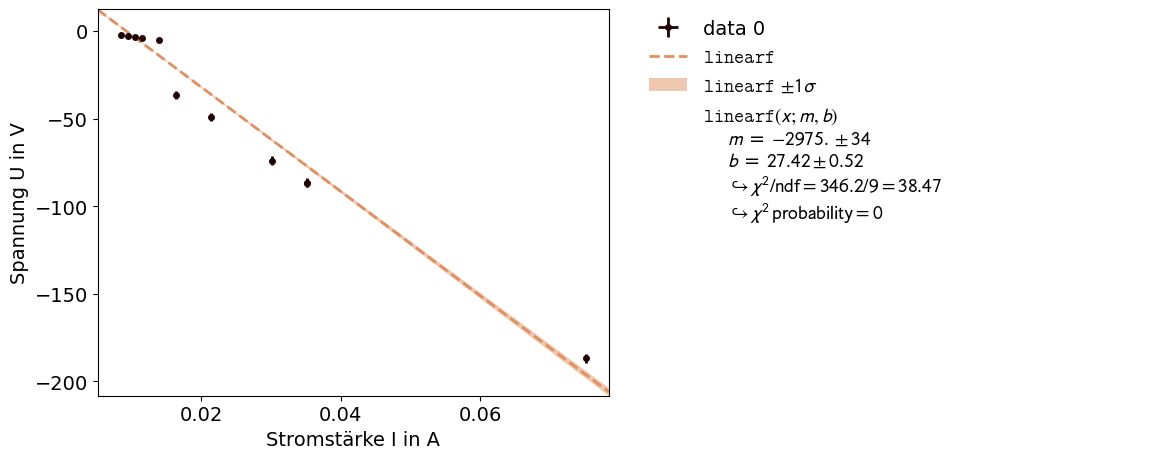

[[ 1.12889999e+03 -1.42642355e+01]
 [-1.42642355e+01  2.69349266e-01]]


In [13]:
#################### Werte für den Fit ####################
#print(f'{"Werte für den Fit":#^50}')

x = I
print("x:", x)
y = U
print("y:", y)

N =len(U)
print("Anzahl der Wertepaare N:" , N)

#################### Umbenennen der Variablen ####################
x_data = x
print("x_data:", x_data)
y_data = y
print("y_data:", y_data)
x_err = I_err
print("x_err:", x_err)
y_err = U_err
print("y_err:", y_err)

#Hier wird der Geraden-Fit berechneet und geplottet

from kafe2 import XYContainer, Fit, Plot
import matplotlib.pyplot as plt
import numpy as np

#Bildung der Varianzgewichteten Mittelwerte z ∈ {x, y, xy, x^2}

#Bildung von Zähler und Nenner der Rechnungen z/y_err**2
sumyerr  = sum(1/(y_err)**2)
#print("Dies ist der Nenner der Mittelwerte:", sumyerr)
xdivyerr = sum(x/(y_err)**2)
#print("Dies ist der Zähler des x-Mittelwert:", xdivyerr)
ydivyerr = sum(y/(y_err)**2)
#print("Dies ist der Zähler des y-Mittelwert:", ydivyerr)
x2divyerr = sum((x**2)/(y_err)**2)
#print("Dies ist der Zähler des x^2-Mittelwert:", x2divyerr)
xydivyerr = sum((x*y)/(y_err)**2)
#print("Dies ist der Zähler des xy-Mittelwert:", xydivyerr)

#Bildung der Varianzgewichteten Mittelwerte
xMittel = xdivyerr/sumyerr
#print("Dies ist der varianzgewichteter Mittelwert von X: ",xMittel)
yMittel = ydivyerr/sumyerr
#print("Dies ist der varianzgewichteter Mittelwert von Y: ",yMittel)
x2Mittel = x2divyerr/sumyerr
#print("Dies ist der Mittelwert von X^2: ",x2Mittel)
xyMittel = xydivyerr/sumyerr
#print("Dies ist der Mittelwert von XY: ",xyMittel)


#Berechnung von m und n:
m = (xyMittel-(xMittel*yMittel))/(x2Mittel-(xMittel)**2) #Steigung m
print("Dies ist die Steigung m: ",m)
n = yMittel - m*xMittel #Achsenabschnitt n
print("Dies ist der y-Achsenabschnitt n: ",n)

#Berechnung von den Varianzen:
sigmayMittel = N/sumyerr #Varianzgewichtete Standardabweichung Sigmay
#print("Dies ist die Varianzgemittelte Standardabweichung Sigmay: ", sigmayMittel)
Vm = sigmayMittel/(16*(x2Mittel-(xMittel)**2)) #Varianz der Steigung
print("Dies ist die Varianz auf m (V[m]): ",Vm)
Vn = x2Mittel*Vm #Varianz des Achsenabschnitt
print("Dies ist die Varianz auf n (V[n]): ",Vn)
Vmn = -Vm * xMittel #Kovarianz von m und n
print("Dies ist die Kovarianz von m und n (Vmn): ",Vmn)

#Berechnung der Güte:
xi2array = (y-m*x-n)**2/y_err #
xi2 = sum(xi2array)
#print("Dies ist der xi^2-Wert des Fits: ",xi2)
güte = xi2/(14-2) #Güte
print("Wir erhalten die Güte als: ", güte)


def linearf(x, m, b):#lineare Funktion definieren
    return m*x+b
def linfit(x_data, y_data, x_err, y_err): #funktion mit den daten als argumenten erstellen
    xy_data = XYContainer(x_data, y_data) # behälter für x und y erstellen
    
    xy_data.add_error(axis='x', err_val=x_err) #x-Fehlerbalken
    xy_data.add_error(axis='y', err_val=y_err) #y-Fehlerbalken
    xy_data.axis_labels = ("Stromstärke I in A", "Spannung U in V", "Stromstärke I in A")
    
    linear_fit = Fit(data=xy_data, model_function=linearf) #Objekt mit dem xy- Behälter und der linearen Funktion erzeugen
    fit_results = linear_fit.do_fit() #Ergebnisse bestimmen und später ausgeben lassen
    
    #linear_fit.report()
    
    plt.figure(figsize=(5,5)) #Größe des Bildes ändern
    plot = Plot(fit_objects=linear_fit) 
    plot.plot()
    
    #plot als jpg abspeichern und anzeigen
    plt.savefig('232e.jpg', dpi = 500)
    plt.show() #Plot anzeigen
    return fit_results

#Ergebnisse in der Kovarianzmatrix ausgeben lassen
print(linfit(x_data, y_data, x_err, y_err)['parameter_cov_mat'])

In [14]:
#################### Werte berechnen ####################
print(f'{"Werte berechnen":#^50}')

R_S_I = (R_1*R_2)/(R_1+R_2)
print("Innenwiderstand R_S_I in Ohm:",R_S_I)

U_S_0 = (R_2/(R_1+R_2))*U_0
print("Spannung U_S_0 in V:", U_S_0)


#U_0 = (R_1+R_2)/R_2*U_S_0
#print("Spannung U_0 in V:", U_S_0)

#################### Fehler berechnen ####################
print(f'{"Fehler berechnen":#^50}')

s1 = (R_2**2/(R_1+R_2)**2)*R_1_err
s2 = (R_1**2/(R_1+R_2)**2)*R_2_err
R_S_I_err = (s1**2+s2**2)**(1/2)
print("Fehler auf R_S_I", R_S_I_err)

s1 = (-(R_2*U_0)/(R_1+R_2)**2)*R_1_err
s2 = ((R_1*U_0)/(R_1+R_2)**2)*R_2_err
s3 = (R_2/(R_1+R_2))*U_0_err
U_S_0_err = (s1**2+s2**2+s3**2)**(1/2)
print("Fehler auf U_S_0:", U_S_0_err)

#U_0_err = ((1/R_2*U_S_0*R_1_err)**2+(-R_1/R_2**2*U_S_0*R_2_err)**2+((R_1+R_2)/R_2*U_S_0_err)**2)**(1/2)
#print("Fehler auf U_0:", U_0_err)

#################Werte berechnen##################
Innenwiderstand R_S_I in Ohm: 1.325
Spannung U_S_0 in V: 0.8925
#################Fehler berechnen#################
Fehler auf R_S_I 0.001873832970144351
Fehler auf U_S_0: 0.0051568510255775276


In [15]:
#232_f
print(f'{"232_f)":#^50}')

Messdaten = "232f.txt" #Dateiname

#Daten Laden und ausgeben
data = np.loadtxt(Messdaten)
print(data) 

#Spalten der Datei auslesen
columb1 = data[:,0] #1.Spalte
columb2 = data[:,1] #2.Spalte
columb3 = data[:,2] #3.Spalte
columb4 = data[:,3] #4.Spalte
columb5 = data[:,4] #5.Spalte
columb6 = data[:,5] #6.Spalte

N=len(columb1)
print("N:", N)

######################232_f)######################
[[1.00e+01 1.65e+00 1.00e+01 1.60e+00 1.00e+01 1.65e+00]
 [2.00e+01 1.50e+00 2.00e+01 1.40e+00 2.00e+01 1.40e+00]
 [3.00e+01 1.30e+00 3.00e+01 1.20e+00 3.00e+01 1.20e+00]
 [4.00e+01 1.10e+00 4.00e+01 1.00e+00 4.00e+01 1.05e+00]
 [5.00e+01 9.50e-01 5.00e+01 8.50e-01 5.00e+01 9.00e-01]
 [6.00e+01 7.50e-01 6.00e+01 6.00e-01 6.00e+01 7.00e-01]
 [7.00e+01 5.50e-01 7.00e+01 5.00e-01 7.00e+01 5.50e-01]
 [8.00e+01 4.00e-01 8.00e+01 3.50e-01 8.00e+01 4.00e-01]
 [9.00e+01 2.00e-01 9.00e+01 2.00e-01 9.00e+01 2.00e-01]
 [9.60e+01 1.00e-01 9.60e+01 5.00e-02 9.60e+01 1.00e-01]]
N: 10


In [16]:
#Hier werden die Werte für die Aufgabe berechnet

import numpy as np

#################### gemessene Werte ####################
print(f'{"Gemessene Werte":#^50}')

R_x_unend = columb1*(5.3/100) #Umrechnung von skt in Ohm
print("Widerstand R_x_unend in Ohm:", R_x_unend)
U_unend = columb2 #in V
print("Spannung U_unend in V:", U_unend)
R_x_20 = columb3*(5.3/100) #Umrechnung von skt in Ohm
print("Widerstand R_x_20 in Ohm:", R_x_20)
U_20 = columb4 #in V
print("Spannung U_20 in V:", U_20)
R_x_50 = columb5*(5.3/100) #Umrechnung von skt in Ohm
print("Widerstand R_x_50 in Ohm:", R_x_50)
U_50 = columb6 #in V
print("Spannung U_50 in V:", U_50)


#################### gemessene Fehler ####################
print(f'{"gemessene Fehler":#^50}')

R_x_unend_err = np.array([0.1*(5.3/100)]*N) #Umrechnung von skt in Ohm
print("Fehler auf R_y_unend in Ohm:", R_x_unend_err)
U_unend_err = np.array([0.1]*N) #in V
print("Fehler auf U_unend in V:", U_unend_err)
R_x_20_err = np.array([0.1*(5.3/100)]*N) #Umrechnung von skt in Ohm
print("Fehler auf R_y_20 in Ohm:", R_x_20_err)
U_20_err = np.array([0.1]*N) #in V
print("Fehler auf U_20 in V:", U_20_err)
R_x_50_err = np.array([0.1*(5.3/100)]*N) #Umrechnung von skt in Ohm
print("Fehler auf R_y_50 in Ohm:", R_x_50_err)
U_50_err = np.array([0.1]*N) #in V
print("Fehler auf U_50 in V:", U_50_err)

#################### Werte berechnen ####################
print(f'{"Werte berechnen":#^50}')

R_y_unend = (100-columb1)*(5.3/100) #in Ohm
print("Widerstand R_y_unend in Ohm:", R_y_unend)
R_y_20 = (100-columb3)*(5.3/100) #in Ohm
print("Widerstand R_y_20 in Ohm:", R_y_20)
R_y_50 = (100-columb5)*(5.3/100) #in Ohm
print("Widerstand R_y_50 in Ohm:", R_y_50)

m_Gleichung = U_0/5.3
print("m aus der Gleichung:", m_Gleichung)

#################### Fehler berechnen ####################
print(f'{"Fehler berechnen":#^50}')

R_y_unend_err = np.array([0.1*(5.3/100)]*N) #Umrechnung von skt in Ohm
print("Fehler auf R_y_unend in Ohm:", R_y_unend_err)
R_y_20_err = np.array([0.1*(5.3/100)]*N) #Umrechnung von skt in Ohm
print("Fehler auf R_y_20 in Ohm:", R_y_20_err)
R_y_50_err = np.array([0.1*(5.3/100)]*N) #Umrechnung von skt in Ohm
print("Fehler auf R_y_50 in Ohm:", R_y_50_err)

m_Gleichung_err = (1/5.3*U_0_err)**(1/2)
print("Fehler auf m aus der Gleichung:", m_Gleichung_err)

#################Gemessene Werte##################
Widerstand R_x_unend in Ohm: [0.53  1.06  1.59  2.12  2.65  3.18  3.71  4.24  4.77  5.088]
Spannung U_unend in V: [1.65 1.5  1.3  1.1  0.95 0.75 0.55 0.4  0.2  0.1 ]
Widerstand R_x_20 in Ohm: [0.53  1.06  1.59  2.12  2.65  3.18  3.71  4.24  4.77  5.088]
Spannung U_20 in V: [1.6  1.4  1.2  1.   0.85 0.6  0.5  0.35 0.2  0.05]
Widerstand R_x_50 in Ohm: [0.53  1.06  1.59  2.12  2.65  3.18  3.71  4.24  4.77  5.088]
Spannung U_50 in V: [1.65 1.4  1.2  1.05 0.9  0.7  0.55 0.4  0.2  0.1 ]
#################gemessene Fehler#################
Fehler auf R_y_unend in Ohm: [0.0053 0.0053 0.0053 0.0053 0.0053 0.0053 0.0053 0.0053 0.0053 0.0053]
Fehler auf U_unend in V: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
Fehler auf R_y_20 in Ohm: [0.0053 0.0053 0.0053 0.0053 0.0053 0.0053 0.0053 0.0053 0.0053 0.0053]
Fehler auf U_20 in V: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
Fehler auf R_y_50 in Ohm: [0.0053 0.0053 0.0053 0.0053 0.0053 0.0053 0.0053 0.0053

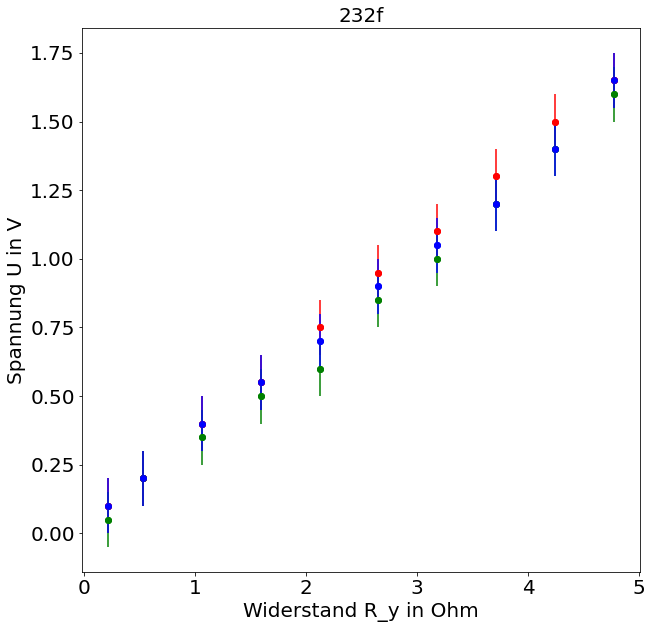

In [17]:
#Hier wird der Plot erstellt

from kafe2 import XYContainer, Fit, Plot
import matplotlib.pyplot as plt
import numpy as np

plt.rc ('font', size = 20) # steuert die Standardtextgröße
plt.rc ('axes', titlesize = 20) # Schriftgröße des Titels
plt.rc ('axes', labelsize = 20) # Schriftgröße der x- und y-Beschriftungen
plt.rc ('xtick', labelsize = 20) #Schriftgröße der x-Tick-Labels
plt.rc ('ytick', labelsize = 20) #Schriftgröße der y-Tick-Labels
plt.rc ('legend', fontsize = 20) #Schriftgröße der Legende

#Plot mir Fehlerbalken
plt.figure(figsize = (10,10)) #Größe des Bildes

plt.scatter(R_y_unend,U_unend, color = "r") #eigentlicher Plot
plt.scatter(R_y_20,U_20, color = "g") #eigentlicher Plot
plt.scatter(R_y_50,U_50, color = "b") #eigentlicher Plot

plt.xlabel("Widerstand R_y in Ohm") #Achsenbeschriftung x-Achse
plt.ylabel("Spannung U in V") #Achsenbeschriftung y-Achse
plt.title("232f") #Titel des Plots

plt.errorbar(R_y_unend, U_unend, xerr = R_y_unend_err, yerr = U_unend_err, fmt = "o", color = "r") #Fehlerbalken, color r = Rot
plt.errorbar(R_y_20, U_20, xerr = R_y_20_err, yerr = U_20_err, fmt = "o", color = "g") #Fehlerbalken, color r = Rot
plt.errorbar(R_y_50, U_50, xerr = R_y_50_err, yerr = U_50_err, fmt = "o", color = "b") #Fehlerbalken, color r = Rot


plt.show #Plot anzeigen
plt.savefig('232f.jpg', dpi = 300) #Plot als jpg-Datei abspeichern

Anzahl der Wertepaare N: 11
x_data: [4.77  4.24  3.71  3.18  2.65  2.12  1.59  1.06  0.53  0.212]
y_data: [1.65 1.5  1.3  1.1  0.95 0.75 0.55 0.4  0.2  0.1 ]
x_err: [0.0053 0.0053 0.0053 0.0053 0.0053 0.0053 0.0053 0.0053 0.0053 0.0053]
y_err: [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
Dies ist die Steigung m:  0.34373021760987216
Dies ist der y-Achsenabschnitt n:  0.022916350387125695
Dies ist die Varianz auf m (V[m]):  0.00030963643161266647
Dies ist die Varianz auf n (V[n]):  0.0024802325287181827
Dies ist die Kovarianz von m und n (Vmn):  -0.000745047181746398
Wir erhalten die Güte als:  0.0013758160012145068


<Figure size 360x360 with 0 Axes>

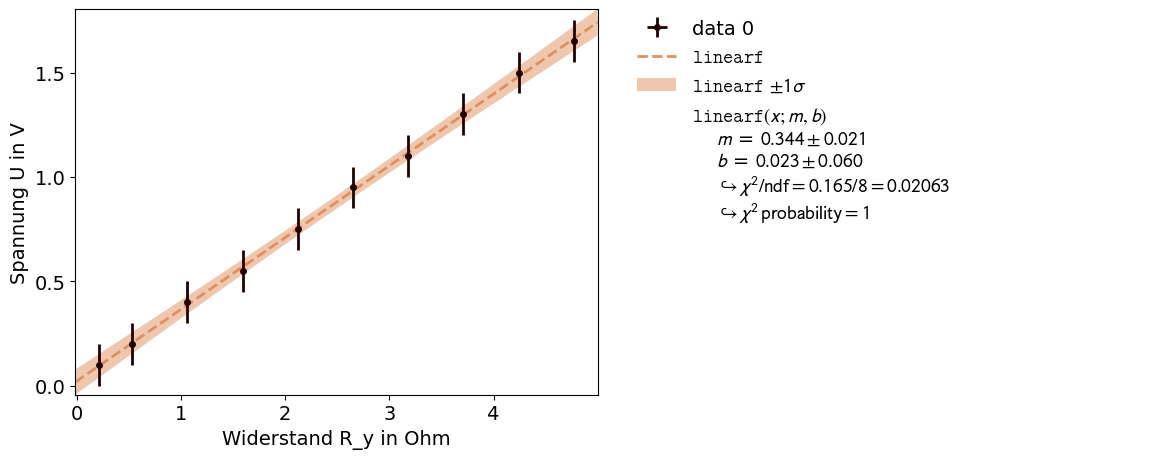

[[ 0.00045052 -0.00108405]
 [-0.00108405  0.00360877]]


In [18]:
#################### Werte für den Fit ####################
#print(f'{"Werte für den Fit":#^50}')

x = R_y_unend
y = U_unend

N =len(U)
print("Anzahl der Wertepaare N:" , N)

#################### Umbenennen der Variablen ####################
x_data = x
print("x_data:", x_data)
y_data = y
print("y_data:", y_data)
x_err = R_y_unend_err
print("x_err:", x_err)
y_err = U_unend_err
print("y_err:", y_err)

#Hier wird der Geraden-Fit berechneet und geplottet

from kafe2 import XYContainer, Fit, Plot
import matplotlib.pyplot as plt
import numpy as np

#Bildung der Varianzgewichteten Mittelwerte z ∈ {x, y, xy, x^2}

#Bildung von Zähler und Nenner der Rechnungen z/y_err**2
sumyerr  = sum(1/(y_err)**2)
#print("Dies ist der Nenner der Mittelwerte:", sumyerr)
xdivyerr = sum(x/(y_err)**2)
#print("Dies ist der Zähler des x-Mittelwert:", xdivyerr)
ydivyerr = sum(y/(y_err)**2)
#print("Dies ist der Zähler des y-Mittelwert:", ydivyerr)
x2divyerr = sum((x**2)/(y_err)**2)
#print("Dies ist der Zähler des x^2-Mittelwert:", x2divyerr)
xydivyerr = sum((x*y)/(y_err)**2)
#print("Dies ist der Zähler des xy-Mittelwert:", xydivyerr)

#Bildung der Varianzgewichteten Mittelwerte
xMittel = xdivyerr/sumyerr
#print("Dies ist der varianzgewichteter Mittelwert von X: ",xMittel)
yMittel = ydivyerr/sumyerr
#print("Dies ist der varianzgewichteter Mittelwert von Y: ",yMittel)
x2Mittel = x2divyerr/sumyerr
#print("Dies ist der Mittelwert von X^2: ",x2Mittel)
xyMittel = xydivyerr/sumyerr
#print("Dies ist der Mittelwert von XY: ",xyMittel)


#Berechnung von m und n:
m = (xyMittel-(xMittel*yMittel))/(x2Mittel-(xMittel)**2) #Steigung m
print("Dies ist die Steigung m: ",m)
n = yMittel - m*xMittel #Achsenabschnitt n
print("Dies ist der y-Achsenabschnitt n: ",n)

#Berechnung von den Varianzen:
sigmayMittel = N/sumyerr #Varianzgewichtete Standardabweichung Sigmay
#print("Dies ist die Varianzgemittelte Standardabweichung Sigmay: ", sigmayMittel)
Vm = sigmayMittel/(16*(x2Mittel-(xMittel)**2)) #Varianz der Steigung
print("Dies ist die Varianz auf m (V[m]): ",Vm)
Vn = x2Mittel*Vm #Varianz des Achsenabschnitt
print("Dies ist die Varianz auf n (V[n]): ",Vn)
Vmn = -Vm * xMittel #Kovarianz von m und n
print("Dies ist die Kovarianz von m und n (Vmn): ",Vmn)

#Berechnung der Güte:
xi2array = (y-m*x-n)**2/y_err #
xi2 = sum(xi2array)
#print("Dies ist der xi^2-Wert des Fits: ",xi2)
güte = xi2/(14-2) #Güte
print("Wir erhalten die Güte als: ", güte)


def linearf(x, m, b):#lineare Funktion definieren
    return m*x+b
def linfit(x_data, y_data, x_err, y_err): #funktion mit den daten als argumenten erstellen
    xy_data = XYContainer(x_data, y_data) # behälter für x und y erstellen
    
    xy_data.add_error(axis='x', err_val=x_err) #x-Fehlerbalken
    xy_data.add_error(axis='y', err_val=y_err) #y-Fehlerbalken
    xy_data.axis_labels = ("Widerstand R_y in Ohm", "Spannung U in V", "Stromstärke I in A")
    
    linear_fit = Fit(data=xy_data, model_function=linearf) #Objekt mit dem xy- Behälter und der linearen Funktion erzeugen
    fit_results = linear_fit.do_fit() #Ergebnisse bestimmen und später ausgeben lassen
    
    #linear_fit.report()
    
    plt.figure(figsize=(5,5)) #Größe des Bildes ändern
    plot = Plot(fit_objects=linear_fit) 
    plot.plot()
    
    #plot als jpg abspeichern und anzeigen
    plt.savefig('232f_fit.jpg', dpi = 500)
    plt.show() #Plot anzeigen
    return fit_results

#Ergebnisse in der Kovarianzmatrix ausgeben lassen
print(linfit(x_data, y_data, x_err, y_err)['parameter_cov_mat'])

In [19]:
#232_g
print(f'{"232_g)":#^50}')

#################### Werte berechnen ####################
print(f'{"Werte berechnen":#^50}')

P_unend = U_unend**2/R_y_unend
print("Leistung P im Lastwiderstand R_unend in Ohm:", P_unend)
P_20 = U_20**2/R_y_20
print("Leistung P im Lastwiderstand R_20 in Ohm:", P_20)
P_50 = U_50**2/R_y_50
print("Leistung P im Lastwiderstand R_50 in Ohm:", P_50)

#################### Fehler berechnen ####################
print(f'{"Fehler berechnen":#^50}')

s1 = ((2*U_unend)/R_y_unend)*U_unend_err
s2 = (-U_unend**2/R_y_unend**2)*R_y_unend_err
P_unend_err = (s1**2+s2**2)**(1/2)
print("Fehler auf P_unend in W:", P_unend_err)

s1 = ((2*U_20)/R_y_20)*U_20_err
s2 = (-U_20**2/R_y_20**2)*R_y_20_err
P_20_err = (s1**2+s2**2)**(1/2)
print("Fehler auf P_20 in W:", P_20_err)

s1 = ((2*U_50)/R_y_50)*U_50_err
s2 = (-U_50**2/R_y_50**2)*R_y_50_err 
P_50_err = (s1**2+s2**2)**(1/2)
print("Fehler auf P_50 in W:", P_50_err)

######################232_g)######################
#################Werte berechnen##################
Leistung P im Lastwiderstand R_unend in Ohm: [0.57075472 0.53066038 0.45552561 0.38050314 0.34056604 0.26533019
 0.19025157 0.1509434  0.0754717  0.04716981]
Leistung P im Lastwiderstand R_20 in Ohm: [0.53668763 0.46226415 0.38814016 0.31446541 0.27264151 0.16981132
 0.1572327  0.11556604 0.0754717  0.01179245]
Leistung P im Lastwiderstand R_50 in Ohm: [0.57075472 0.46226415 0.38814016 0.34669811 0.30566038 0.23113208
 0.19025157 0.1509434  0.0754717  0.04716981]
#################Fehler berechnen#################
Fehler auf P_unend in W: [0.0691853  0.07075783 0.07008388 0.0691853  0.07170135 0.07075783
 0.0691853  0.07547547 0.07547547 0.09434699]
Fehler auf P_20 in W: [0.0670886  0.06604026 0.0646924  0.06289527 0.06415326 0.05660537
 0.06289527 0.06604026 0.07547547 0.04717073]
Fehler auf P_50 in W: [0.0691853  0.06604026 0.0646924  0.06604026 0.06792728 0.06604026
 0.0691853  0.075

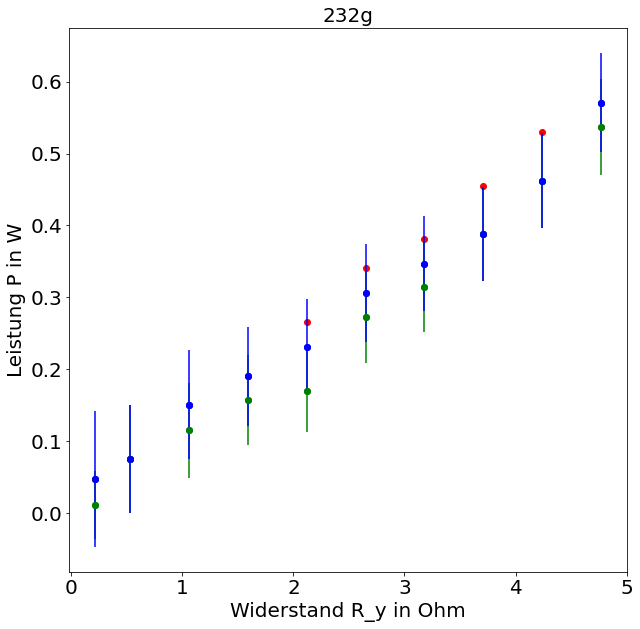

In [20]:
#Hier wird der Plot erstellt

from kafe2 import XYContainer, Fit, Plot
import matplotlib.pyplot as plt
import numpy as np

plt.rc ('font', size = 20) # steuert die Standardtextgröße
plt.rc ('axes', titlesize = 20) # Schriftgröße des Titels
plt.rc ('axes', labelsize = 20) # Schriftgröße der x- und y-Beschriftungen
plt.rc ('xtick', labelsize = 20) #Schriftgröße der x-Tick-Labels
plt.rc ('ytick', labelsize = 20) #Schriftgröße der y-Tick-Labels
plt.rc ('legend', fontsize = 20) #Schriftgröße der Legende

#Plot mir Fehlerbalken
plt.figure(figsize = (10,10)) #Größe des Bildes

plt.scatter(R_y_unend,P_unend, color = "r") #eigentlicher Plot
plt.scatter(R_y_20,P_20, color = "g") #eigentlicher Plot
plt.scatter(R_y_50,P_50, color = "b") #eigentlicher Plot

plt.xlabel("Widerstand R_y in Ohm") #Achsenbeschriftung x-Achse
plt.ylabel("Leistung P in W") #Achsenbeschriftung y-Achse
plt.title("232g") #Titel des Plots

#plt.errorbar(R_y_unend, U_unend, xerr = R_y_unend_err, yerr = P_unend_err, fmt = "o", color = "r") #Fehlerbalken, color r = Rot
plt.errorbar(R_y_20, P_20, xerr = R_y_20_err, yerr = P_20_err, fmt = "o", color = "g") #Fehlerbalken, color r = Rot
plt.errorbar(R_y_50, P_50, xerr = R_y_50_err, yerr = P_50_err, fmt = "o", color = "b") #Fehlerbalken, color r = Rot


plt.show #Plot anzeigen
plt.savefig('232g.jpg', dpi = 300) #Plot als jpg-Datei abspeichern

In [21]:
#232_h
print(f'{"232_h)":#^50}')

#################### gemessene Werte ####################
print(f'{"Gemessene Werte":#^50}')

R_x = 52.7*(5.3/100) # in Ohm
print("R_x in Ohm:", R_x)

#################### gemessene Fehler ####################
print(f'{"gemessene Fehler":#^50}')

R_x_err = 0.1*(5.3/100) # in Ohm
print("Fehler auf R_x in Ohm:", R_x_err)

#################### Werte berechnen ####################
#print(f'{"Werte berechnen":#^50}')

#################### Fehler berechnen ####################
#print(f'{"Fehler berechnen":#^50}')

######################232_h)######################
#################Gemessene Werte##################
R_x in Ohm: 2.7931
#################gemessene Fehler#################
Fehler auf R_x in Ohm: 0.0053


In [22]:
#232_i
print(f'{"232_i)":#^50}')

#################### gemessene Werte ####################
print(f'{"Gemessene Werte":#^50}')

x_w = 52.7 #in skt
print("x_w für das Weston-Element in skt:", x_w)

U_w = 1.0190 #in V
print("Spannug U_w in V", U_w)

x_2 = 39.4 #in skt
print("x_2 für die unbekannte Batterie in skt", x_2)


#################### gemessene Fehler ####################
print(f'{"gemessene Fehler":#^50}')

x_w_err = 0.1 #in skt
print("Fehler aud x_w in kst:", x_w_err)

x_2_err = 0.1 #in skt
print("Fehler aud x_2 in kst:", x_2_err)

U_w_err =  0.0005 #in V
print("Fehler aud U_w in V", U_w_err)

#################### Werte berechnen ####################
print(f'{"Werte berechnen":#^50}')

U_2 = (U_w*x_w)/x_2
print("Spannung U_2 der unbekannten Batterie in V:", U_2)

#################### Fehler berechnen ####################
print(f'{"Fehler berechnen":#^50}')

s1 = (x_w/x_2)*U_w_err
s2 = (U_w/x_2)*x_w_err
s3 = (-(U_w*x_w)/x_2**2)*x_2_err
U_2_err = (s1**2+s2**2+s3**2)**(1/2)#in V
print("Fehler aud U_2 in V", U_2_err)


######################232_i)######################
#################Gemessene Werte##################
x_w für das Weston-Element in skt: 52.7
Spannug U_w in V 1.019
x_2 für die unbekannte Batterie in skt 39.4
#################gemessene Fehler#################
Fehler aud x_w in kst: 0.1
Fehler aud x_2 in kst: 0.1
Fehler aud U_w in V 0.0005
#################Werte berechnen##################
Spannung U_2 der unbekannten Batterie in V: 1.3629771573604061
#################Fehler berechnen#################
Fehler aud U_2 in V 0.004370717541249958


In [23]:
#232_j
print(f'{"232_j)":#^50}')

#################### gemessene Werte ####################
print(f'{"Gemessene Werte":#^50}')

U_L_mav = 1.3
print("Leerlaufspannung mit dem Mavometer gemessen in V:", U_L_mav)

U_L_mult = 1.294
print("Leerlaufspannung mit dem Multimeter gemessen in V:", U_L_mult)

#################### gemessene Fehler ####################
print(f'{"gemessene Fehler":#^50}')

U_L_mav_err = 0.1 # in V
print("Fehler auf U_L_mav in V:", U_L_mav_err)

U_L_mult_err = 0.005 # in V
print("Fehler auf U_L_mult in V:", U_L_mult_err)

######################232_j)######################
#################Gemessene Werte##################
Leerlaufspannung mit dem Mavometer gemessen in V: 1.3
Leerlaufspannung mit dem Multimeter gemessen in V: 1.294
#################gemessene Fehler#################
Fehler auf U_L_mav in V: 0.1
Fehler auf U_L_mult in V: 0.005


In [24]:
#232_k
print(f'{"232_k)":#^50}')

#################### gemessene Werte ####################
print(f'{"Gemessene Werte":#^50}')

R_x = 47.9*(5.3/100) # in Ohm
print("R_x in Ohm:", R_x)

R_2 = 50 #in Ohm
print("R_2 in Ohm:", R_2)

#################### gemessene Fehler ####################
print(f'{"gemessene Fehler":#^50}')

R_x_err = 0.1*(5.3/100) # in Ohm
print("Fehler auf R_x in Ohm:", R_x_err)

R_2_err = 0 #im gelben Kasten

#################### Werte berechnen ####################
print(f'{"Werte berechnen":#^50}')

R_y = (100-47.9)*(5.3/100)
print("R_y in Ohm", R_y)

R_1 = (R_x/R_y)*R_2
print("R_1 in Ohm:", R_1)


#################### Fehler berechnen ####################
print(f'{"Fehler berechnen":#^50}')

R_y_err = 0.1*(5.3/100) # in Ohm
print("Fehler auf R_y in Ohm:", R_y_err)

s1 = (R_2/R_y)*R_x_err
s2 = (-(R_x*R_2)/R_y**2)*R_y_err
R_1_err = (s1**2+s2**2)**(1/2)
print("Fehler aud R_1 in Ohm:", R_1_err)

######################232_k)######################
#################Gemessene Werte##################
R_x in Ohm: 2.5387
R_2 in Ohm: 50
#################gemessene Fehler#################
Fehler auf R_x in Ohm: 0.0053
#################Werte berechnen##################
R_y in Ohm 2.7613
R_1 in Ohm: 45.96928982725528
#################Fehler berechnen#################
Fehler auf R_y in Ohm: 0.0053
Fehler aud R_1 in Ohm: 0.1303653785854389


In [25]:
#232_l
print(f'{"232_l)":#^50}')

#Frage

######################232_l)######################


In [26]:
#232_m
print(f'{"232_m)":#^50}')

#Messwerte für die n)

######################232_m)######################


In [27]:
#232_n
print(f'{"232_n)":#^50}')

Messdaten = "232m.txt" #Dateiname

#Daten Laden und ausgeben
data = np.loadtxt(Messdaten)
print(data) 

#Spalten der Datei auslesen
columb1 = data[:,0] #1.Spalte
columb2 = data[:,1] #2.Spalte
columb3 = data[:,2] #3.Spalte
columb4 = data[:,3] #4.Spalte
columb5 = data[:,4] #5.Spalte
columb6 = data[:,5] #6.Spalte
columb7 = data[:,6] #7.Spalte
columb8 = data[:,7] #8.Spalte
columb9 = data[:,8] #9.Spalte
columb10 = data[:,9] #10.Spalte


N=len(columb1)
print("N:", N)

######################232_n)######################
[[1.174e+00 2.010e+01 4.700e+00 2.040e+01 9.570e+01 2.150e+01 1.099e+03
  2.290e+01 1.002e+02 2.390e+01]
 [9.400e-01 2.470e+01 4.700e+00 2.570e+01 1.055e+02 2.710e+01 1.115e+03
  2.790e+01 1.002e+02 2.820e+01]
 [8.050e-01 2.970e+01 4.800e+00 3.030e+01 1.187e+02 3.100e+01 1.135e+03
  3.260e+01 1.004e+02 3.330e+01]
 [6.530e-01 3.450e+01 4.500e+00 3.510e+01 1.420e+02 3.610e+01 1.150e+03
  3.660e+01 1.002e+02 3.730e+01]
 [5.750e-01 3.790e+01 4.700e+00 3.860e+01 1.777e+02 3.960e+01 1.167e+03
  4.040e+01 1.002e+02 4.130e+01]
 [4.580e-01 4.340e+01 4.600e+00 4.420e+01 4.770e+02 4.660e+01 1.189e+03
  4.740e+01 1.001e+02 4.830e+01]
 [3.800e-01 4.910e+01 4.600e+00 4.990e+01 4.800e+02 5.100e+01 1.205e+03
  5.440e+01 1.001e+02 5.480e+01]
 [3.220e-01 5.350e+01 4.800e+00 5.480e+01 9.900e+02 5.590e+01 1.221e+03
  5.670e+01 1.002e+02 5.700e+01]
 [2.790e-01 5.790e+01 4.700e+00 5.850e+01 3.450e+03 5.930e+01 1.238e+03
  6.030e+01 1.000e+02 6.080e+01]
 [2.

In [28]:
#Hier werden die Werte für die Aufgabe berechnet

import numpy as np

#gemessene Werte
R_1 = columb1*1000 #Umrechnung von kilo-Ohm in Ohm
print("Widerstand R_1 in Ohm:", R_1)
T_1 = columb2 #in °C
print("Temperatur T_1 in °C:", T_1)

R_2 = columb3#in Ohm
print("Widerstand R_2 in Ohm:", R_2)
T_2 = columb4 #in °C
print("Temperatur T_2 in °C:", T_2)

R_3 = columb5 #in Ohm
print("Widerstand R_3 in Ohm:", R_3)
T_3 = columb6 #in °C
print("Temperatur T_3 in °C:", T_3)

R_4 = columb7 #in Ohm
print("Widerstand R_4 in Ohm:", R_4)
T_4 = columb8 #in °C
print("Temperatur T_4 in °C:", T_4)

R_5 = columb9 #in Ohm
print("Widerstand R_5 in Ohm:", R_5)
T_5 = columb10 #in °C
print("Temperatur T_6 in °C:", T_5)



#Fehler
R_1_err = np.array([0.001*1000]*N) #in Ohm 
print("Fehler auf R_1:", R_1_err)
T_1_err = np.array([0.1]*N) #in °T
print("Fehler auf T_1:", T_1_err)

R_2_err = np.array([0.1]*N) #in Ohm 
print("Fehler auf R_2:", R_2_err)
T_2_err = np.array([0.1]*N) #in °T
print("Fehler auf T_2:", T_2_err)

R_3_err = np.array([0.1]*N) #in Ohm 
print("Fehler auf R_3:", R_3_err)
T_3_err = np.array([0.1]*N) #in °T
print("Fehler auf T_3:", T_3_err)

R_4_err = np.array([0.001*1000]*N) #in Ohm 
print("Fehler auf R_4:", R_4_err)
T_4_err = np.array([0.1]*N) #in °T
print("Fehler auf T_4:", T_4_err)

R_5_err = np.array([0.1]*N) #in Ohm 
print("Fehler auf R_5:", R_5_err)
T_5_err = np.array([0.1]*N) #in °T
print("Fehler auf T_5:", T_5_err)

#R_0 bestimmen
R_1_0 = data[0,0]
print("R_1_0:", R_1_0)
R_2_0 = data[0,2]
print("R_2_0:", R_2_0)
R_3_0 = data[0,4]
print("R_3_0:", R_3_0)
R_4_0 = data[0,6]
print("R_4_0:", R_4_0)
R_5_0 = data[0,8]
print("R_5_0:", R_5_0)

Widerstand R_1 in Ohm: [1174.   940.   805.   653.   575.   458.   380.   322.   279.   246.
  215.   190.   174.   158.   140.   127.   115.   104.    92.    84.
   81.    79.5]
Temperatur T_1 in °C: [20.1 24.7 29.7 34.5 37.9 43.4 49.1 53.5 57.9 61.7 65.2 69.2 71.8 75.2
 79.1 82.6 85.6 89.  93.5 96.8 98.4 99. ]
Widerstand R_2 in Ohm: [4.7 4.7 4.8 4.5 4.7 4.6 4.6 4.8 4.7 4.6 4.8 4.7 4.6 4.8 4.6 4.7 4.8 4.7
 4.6 4.8 4.7 4.6]
Temperatur T_2 in °C: [20.4 25.7 30.3 35.1 38.6 44.2 49.9 54.8 58.5 62.2 65.7 69.5 72.4 75.7
 80.3 83.1 86.  89.6 93.9 97.4 98.4 99.4]
Widerstand R_3 in Ohm: [9.570e+01 1.055e+02 1.187e+02 1.420e+02 1.777e+02 4.770e+02 4.800e+02
 9.900e+02 3.450e+03 1.100e+03 3.600e+04 9.000e+04 1.400e+05 3.200e+05
 3.500e+05 3.700e+05 4.370e+05 3.800e+05 3.500e+05 3.200e+05 2.600e+05
 2.560e+05]
Temperatur T_3 in °C: [21.5 27.1 31.  36.1 39.6 46.6 51.  55.9 59.3 62.7 66.8 70.  73.  77.
 71.1 84.  87.5 91.9 94.9 98.  98.6 99.3]
Widerstand R_4 in Ohm: [1099. 1115. 1135. 1150. 1167. 1

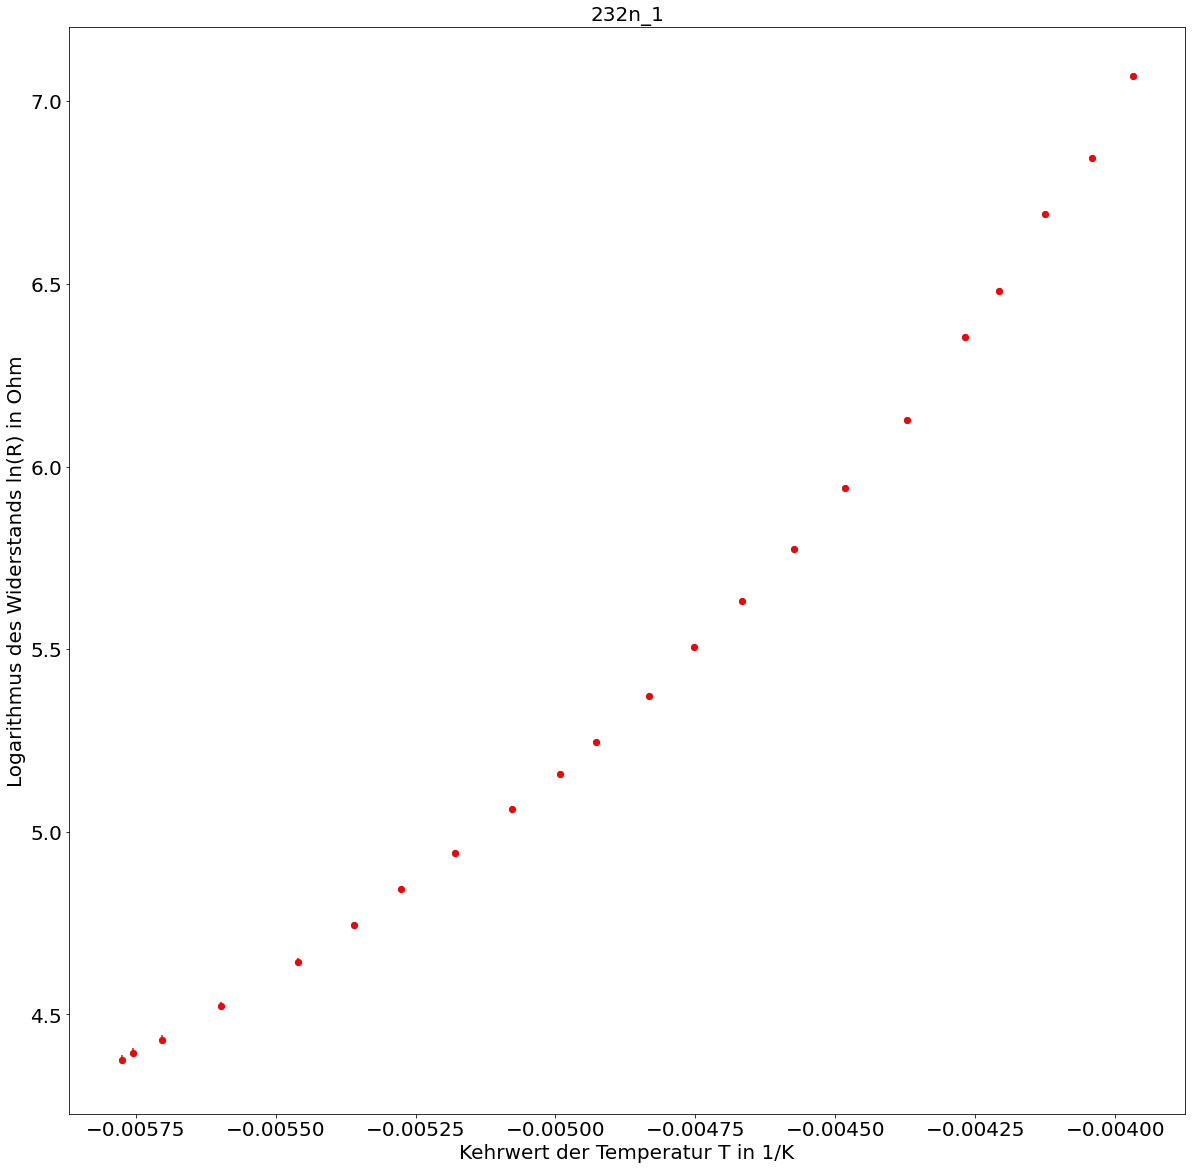

In [29]:

#Hier wird der Plot erstellt

from kafe2 import XYContainer, Fit, Plot
import matplotlib.pyplot as plt
import numpy as np

plt.rc ('font', size = 20) # steuert die Standardtextgröße
plt.rc ('axes', titlesize = 20) # Schriftgröße des Titels
plt.rc ('axes', labelsize = 20) # Schriftgröße der x- und y-Beschriftungen
plt.rc ('xtick', labelsize = 20) #Schriftgröße der x-Tick-Labels
plt.rc ('ytick', labelsize = 20) #Schriftgröße der y-Tick-Labels
plt.rc ('legend', fontsize = 20) #Schriftgröße der Legende

#Plot mir Fehlerbalken
plt.figure(figsize = (20,20)) #Größe des Bildes
plt.scatter(1/(T_1-272.15), np.log(R_1)) #eigentlicher Plot

plt.xlabel("Kehrwert der Temperatur T in 1/K") #Achsenbeschriftung x-Achse
plt.ylabel("Logarithmus des Widerstands ln(R) in Ohm") #Achsenbeschriftung y-Achse
plt.title("232n_1") #Titel des Plots
plt.errorbar(1/(T_1-272.15), np.log(R_1), xerr = (1/(T_1-272.15)**2)*T_1_err, yerr = (1/R_1)*R_1_err, fmt = "o", color = "r") #Fehlerbalken, color r = Rot
plt.show #Plot anzeigen
plt.savefig('232n_1.jpg', dpi = 300) #Plot als jpg-Datei abspeichern

Anzahl der Wertepaare N: 22
Dies ist die Steigung m:  1819.5301345348194
Dies ist der y-Achsenabschnitt n:  14.208831045720434
Dies ist die Varianz auf m (V[m]):  3.616220809819415
Dies ist die Varianz auf n (V[n]):  6.349787560986186e-05
Dies ist die Kovarianz von m und n (Vmn):  0.015116700851767941
Wir erhalten die Güte als:  16.225703476222886


<Figure size 360x360 with 0 Axes>

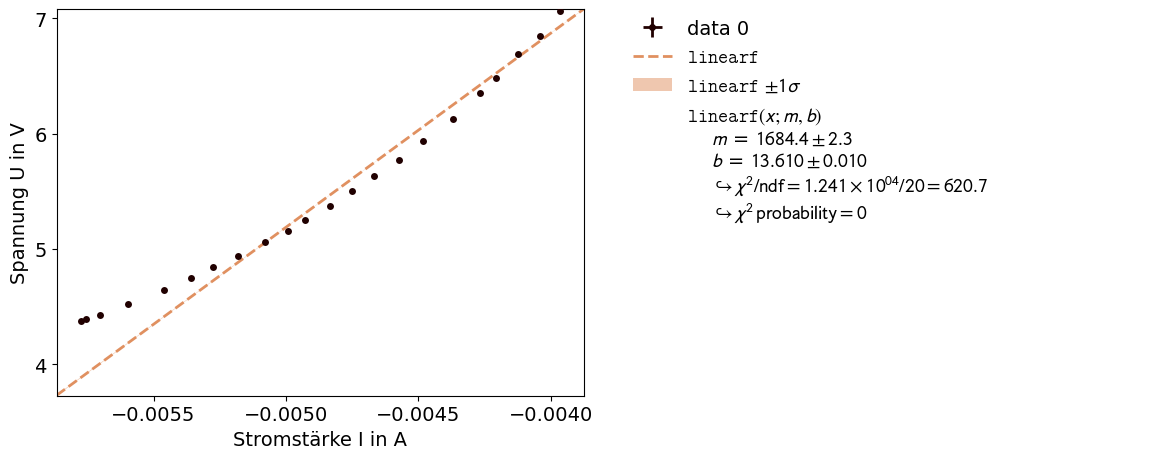

[[5.31732049e+00 2.33679730e-02]
 [2.33679730e-02 1.03798909e-04]]


In [30]:
x_data = 1/(T_1-272.15)
#print("x_data:", x_data)
y_data = np.log(R_1)
#print("y_data:", y_data)


#Fehler für den Fit
x_err = (1/(T_1-272.15)**2)*T_1_err
#print("x_err:", x_err)
y_err = (1/R_1)*R_1_err
#print("y_err:", y_err)


#Hier wird der Geraden-Fit berechneet und geplottet

from kafe2 import XYContainer, Fit, Plot
import matplotlib.pyplot as plt
import numpy as np

#N = Anzahl der Wertepaare
print("Anzahl der Wertepaare N:" , N)

#Umbenennen der Variablen
x = x_data
y = y_data
# Fehler x_err und y_err werden aus der vorherigen zelle übernommen

#Bildung der Varianzgewichteten Mittelwerte z ∈ {x, y, xy, x^2}

#Bildung von Zähler und Nenner der Rechnungen z/y_err**2
sumyerr  = sum(1/(y_err)**2)
#print("Dies ist der Nenner der Mittelwerte:", sumyerr)
xdivyerr = sum(x/(y_err)**2)
#print("Dies ist der Zähler des x-Mittelwert:", xdivyerr)
ydivyerr = sum(y/(y_err)**2)
#print("Dies ist der Zähler des y-Mittelwert:", ydivyerr)
x2divyerr = sum((x**2)/(y_err)**2)
#print("Dies ist der Zähler des x^2-Mittelwert:", x2divyerr)
xydivyerr = sum((x*y)/(y_err)**2)
#print("Dies ist der Zähler des xy-Mittelwert:", xydivyerr)

#Bildung der Varianzgewichteten Mittelwerte
xMittel = xdivyerr/sumyerr
#print("Dies ist der varianzgewichteter Mittelwert von X: ",xMittel)
yMittel = ydivyerr/sumyerr
#print("Dies ist der varianzgewichteter Mittelwert von Y: ",yMittel)
x2Mittel = x2divyerr/sumyerr
#print("Dies ist der Mittelwert von X^2: ",x2Mittel)
xyMittel = xydivyerr/sumyerr
#print("Dies ist der Mittelwert von XY: ",xyMittel)


#Berechnung von m und n:
m = (xyMittel-(xMittel*yMittel))/(x2Mittel-(xMittel)**2) #Steigung m
print("Dies ist die Steigung m: ",m)
n = yMittel - m*xMittel #Achsenabschnitt n
print("Dies ist der y-Achsenabschnitt n: ",n)

#Berechnung von den Varianzen:
sigmayMittel = N/sumyerr #Varianzgewichtete Standardabweichung Sigmay
#print("Dies ist die Varianzgemittelte Standardabweichung Sigmay: ", sigmayMittel)
Vm = sigmayMittel/(16*(x2Mittel-(xMittel)**2)) #Varianz der Steigung
print("Dies ist die Varianz auf m (V[m]): ",Vm)
Vn = x2Mittel*Vm #Varianz des Achsenabschnitt
print("Dies ist die Varianz auf n (V[n]): ",Vn)
Vmn = -Vm * xMittel #Kovarianz von m und n
print("Dies ist die Kovarianz von m und n (Vmn): ",Vmn)

#Berechnung der Güte:
xi2array = (y-m*x-n)**2/y_err #
xi2 = sum(xi2array)
#print("Dies ist der xi^2-Wert des Fits: ",xi2)
güte = xi2/(14-2) #Güte
print("Wir erhalten die Güte als: ", güte)


def linearf(x, m, b):#lineare Funktion definieren
    return m*x+b
def linfit(x_data, y_data, x_err, y_err): #funktion mit den daten als argumenten erstellen
    xy_data = XYContainer(x_data, y_data) # behälter für x und y erstellen
    
    xy_data.add_error(axis='x', err_val=x_err) #x-Fehlerbalken
    xy_data.add_error(axis='y', err_val=y_err) #y-Fehlerbalken
    xy_data.axis_labels = ("Stromstärke I in A", "Spannung U in V", "Stromstärke I in A")
    
    linear_fit = Fit(data=xy_data, model_function=linearf) #Objekt mit dem xy- Behälter und der linearen Funktion erzeugen
    fit_results = linear_fit.do_fit() #Ergebnisse bestimmen und später ausgeben lassen
    
    #linear_fit.report()
    
    plt.figure(figsize=(5,5)) #Größe des Bildes ändern
    plot = Plot(fit_objects=linear_fit) 
    plot.plot()
    
    #plot als jpg abspeichern und anzeigen
    plt.savefig('232n_1_fit.jpg', dpi = 500)
    plt.show() #Plot anzeigen
    return fit_results

#Ergebnisse in der Kovarianzmatrix ausgeben lassen
print(linfit(x_data, y_data, x_err, y_err)['parameter_cov_mat'])

In [31]:
#alpha berechnen
k_B = 1.380658*10**-23

E_G = 2*m*k_B
print("E_G:", E_G)

E_G_err = ((2*k_B*Vm)**2)**(1/2)
print("Fehler auf E_G:", E_G_err)

E_G: 5.024297672973149e-20
Fehler auf E_G: 9.985528381687306e-23


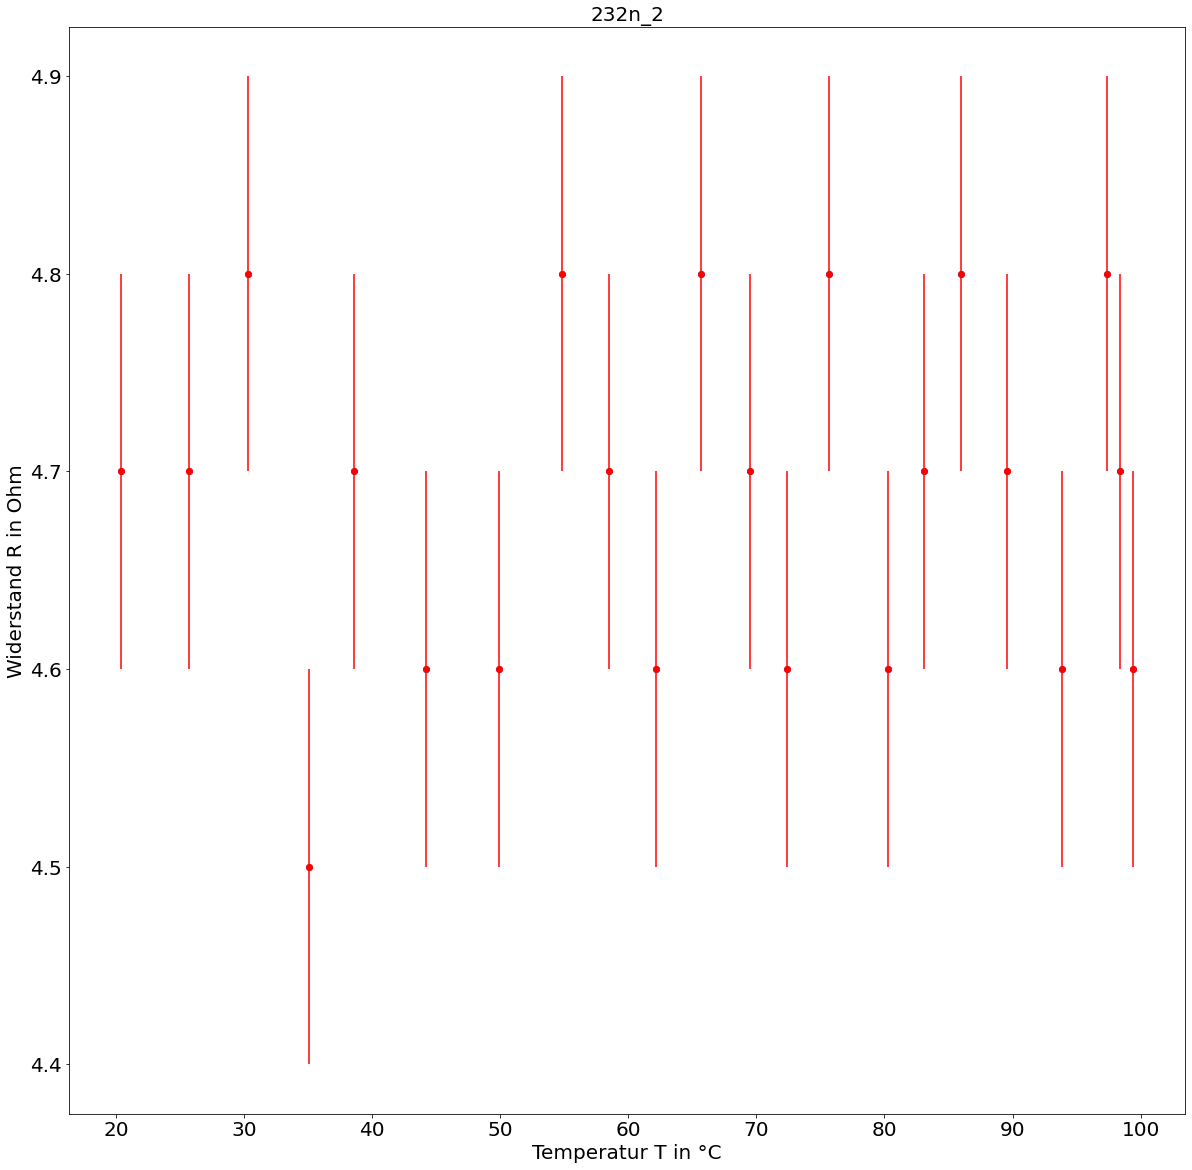

In [32]:

#Hier wird der Plot erstellt

from kafe2 import XYContainer, Fit, Plot
import matplotlib.pyplot as plt
import numpy as np

plt.rc ('font', size = 20) # steuert die Standardtextgröße
plt.rc ('axes', titlesize = 20) # Schriftgröße des Titels
plt.rc ('axes', labelsize = 20) # Schriftgröße der x- und y-Beschriftungen
plt.rc ('xtick', labelsize = 20) #Schriftgröße der x-Tick-Labels
plt.rc ('ytick', labelsize = 20) #Schriftgröße der y-Tick-Labels
plt.rc ('legend', fontsize = 20) #Schriftgröße der Legende

#Plot mir Fehlerbalken
plt.figure(figsize = (20,20)) #Größe des Bildes
plt.scatter(T_2, R_2) #eigentlicher Plot

plt.xlabel("Temperatur T in °C") #Achsenbeschriftung x-Achse
plt.ylabel("Widerstand R in Ohm") #Achsenbeschriftung y-Achse
plt.title("232n_2") #Titel des Plots
plt.errorbar(T_2, R_2, xerr = T_2_err, yerr = R_2_err, fmt = "o", color = "r") #Fehlerbalken, color r = Rot
plt.show #Plot anzeigen
plt.savefig('232n_2.jpg', dpi = 300) #Plot als jpg-Datei abspeichern

Anzahl der Wertepaare N: 22
Dies ist die Steigung m:  0.00024799669337748157
Dies ist der y-Achsenabschnitt n:  4.670231451459431
Dies ist die Varianz auf m (V[m]):  1.047605079551319e-06
Dies ist die Varianz auf n (V[n]):  0.005057943513134105
Dies ist die Kovarianz von m und n (Vmn):  -6.814671042481329e-05
Wir erhalten die Güte als:  0.13758488472678965


<Figure size 360x360 with 0 Axes>

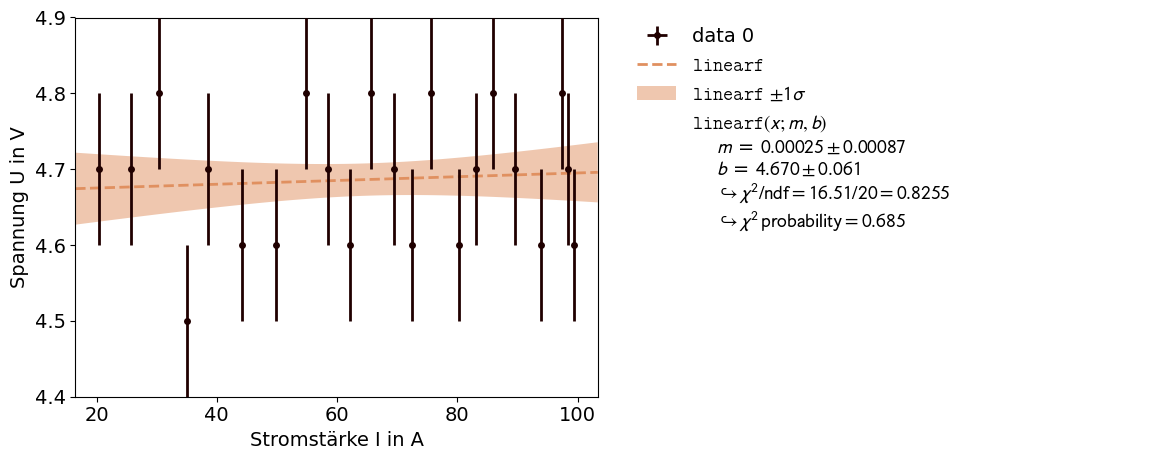

[[ 7.61891285e-07 -4.95610283e-05]
 [-4.95610283e-05  3.67849039e-03]]


In [33]:
x_data = T_2
#print("x_data:", x_data)
y_data = R_2
#print("y_data:", y_data)


#Fehler für den Fit
x_err = T_2_err
#print("x_err:", x_err)
y_err = R_2_err
#print("y_err:", y_err)


#Hier wird der Geraden-Fit berechneet und geplottet

from kafe2 import XYContainer, Fit, Plot
import matplotlib.pyplot as plt
import numpy as np

#N = Anzahl der Wertepaare
print("Anzahl der Wertepaare N:" , N)

#Umbenennen der Variablen
x = x_data
y = y_data
# Fehler x_err und y_err werden aus der vorherigen zelle übernommen

#Bildung der Varianzgewichteten Mittelwerte z ∈ {x, y, xy, x^2}

#Bildung von Zähler und Nenner der Rechnungen z/y_err**2
sumyerr  = sum(1/(y_err)**2)
#print("Dies ist der Nenner der Mittelwerte:", sumyerr)
xdivyerr = sum(x/(y_err)**2)
#print("Dies ist der Zähler des x-Mittelwert:", xdivyerr)
ydivyerr = sum(y/(y_err)**2)
#print("Dies ist der Zähler des y-Mittelwert:", ydivyerr)
x2divyerr = sum((x**2)/(y_err)**2)
#print("Dies ist der Zähler des x^2-Mittelwert:", x2divyerr)
xydivyerr = sum((x*y)/(y_err)**2)
#print("Dies ist der Zähler des xy-Mittelwert:", xydivyerr)

#Bildung der Varianzgewichteten Mittelwerte
xMittel = xdivyerr/sumyerr
#print("Dies ist der varianzgewichteter Mittelwert von X: ",xMittel)
yMittel = ydivyerr/sumyerr
#print("Dies ist der varianzgewichteter Mittelwert von Y: ",yMittel)
x2Mittel = x2divyerr/sumyerr
#print("Dies ist der Mittelwert von X^2: ",x2Mittel)
xyMittel = xydivyerr/sumyerr
#print("Dies ist der Mittelwert von XY: ",xyMittel)


#Berechnung von m und n:
m = (xyMittel-(xMittel*yMittel))/(x2Mittel-(xMittel)**2) #Steigung m
print("Dies ist die Steigung m: ",m)
n = yMittel - m*xMittel #Achsenabschnitt n
print("Dies ist der y-Achsenabschnitt n: ",n)

#Berechnung von den Varianzen:
sigmayMittel = N/sumyerr #Varianzgewichtete Standardabweichung Sigmay
#print("Dies ist die Varianzgemittelte Standardabweichung Sigmay: ", sigmayMittel)
Vm = sigmayMittel/(16*(x2Mittel-(xMittel)**2)) #Varianz der Steigung
print("Dies ist die Varianz auf m (V[m]): ",Vm)
Vn = x2Mittel*Vm #Varianz des Achsenabschnitt
print("Dies ist die Varianz auf n (V[n]): ",Vn)
Vmn = -Vm * xMittel #Kovarianz von m und n
print("Dies ist die Kovarianz von m und n (Vmn): ",Vmn)

#Berechnung der Güte:
xi2array = (y-m*x-n)**2/y_err #
xi2 = sum(xi2array)
#print("Dies ist der xi^2-Wert des Fits: ",xi2)
güte = xi2/(14-2) #Güte
print("Wir erhalten die Güte als: ", güte)


def linearf(x, m, b):#lineare Funktion definieren
    return m*x+b
def linfit(x_data, y_data, x_err, y_err): #funktion mit den daten als argumenten erstellen
    xy_data = XYContainer(x_data, y_data) # behälter für x und y erstellen
    
    xy_data.add_error(axis='x', err_val=x_err) #x-Fehlerbalken
    xy_data.add_error(axis='y', err_val=y_err) #y-Fehlerbalken
    xy_data.axis_labels = ("Stromstärke I in A", "Spannung U in V", "Stromstärke I in A")
    
    linear_fit = Fit(data=xy_data, model_function=linearf) #Objekt mit dem xy- Behälter und der linearen Funktion erzeugen
    fit_results = linear_fit.do_fit() #Ergebnisse bestimmen und später ausgeben lassen
    
    #linear_fit.report()
    
    plt.figure(figsize=(5,5)) #Größe des Bildes ändern
    plot = Plot(fit_objects=linear_fit) 
    plot.plot()
    
    #plot als jpg abspeichern und anzeigen
    plt.savefig('232n_2_fit.jpg', dpi = 500)
    plt.show() #Plot anzeigen
    return fit_results

#Ergebnisse in der Kovarianzmatrix ausgeben lassen
print(linfit(x_data, y_data, x_err, y_err)['parameter_cov_mat'])

In [34]:
#alpha berechnen

alpha = m/n
print("alpha:", alpha)

alpha_err = ((1/n*Vm)**2+(-m/n**2*Vn)**2)**(1/2)
print("Fehler auf alpha:", alpha_err)

alpha: 5.310158521158164e-05
Fehler auf alpha: 2.315703293268865e-07


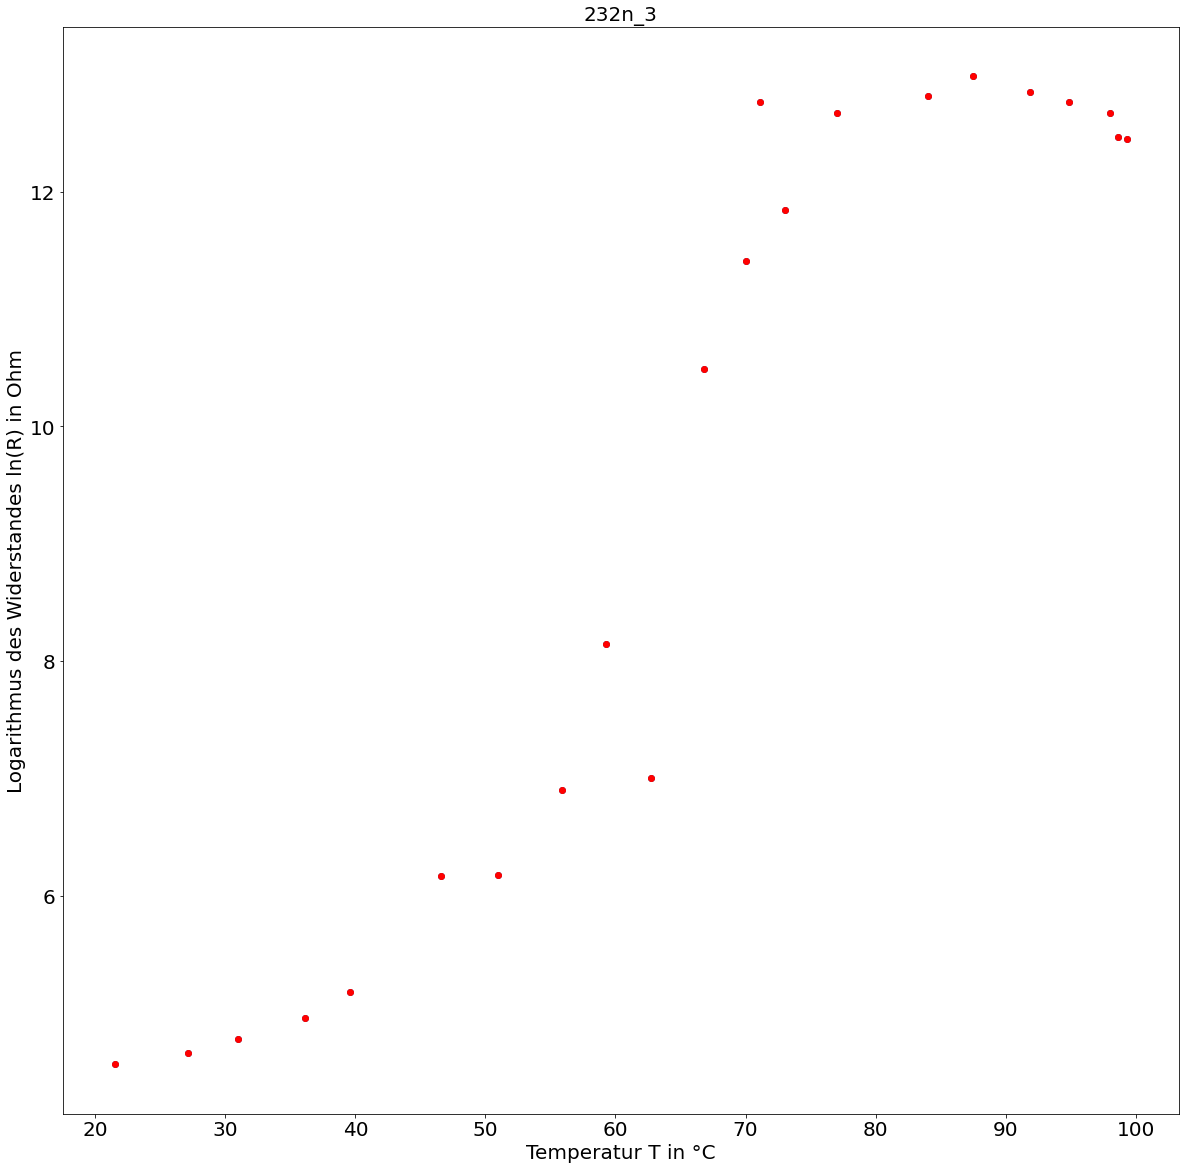

In [35]:

#Hier wird der Plot erstellt

from kafe2 import XYContainer, Fit, Plot
import matplotlib.pyplot as plt
import numpy as np

plt.rc ('font', size = 20) # steuert die Standardtextgröße
plt.rc ('axes', titlesize = 20) # Schriftgröße des Titels
plt.rc ('axes', labelsize = 20) # Schriftgröße der x- und y-Beschriftungen
plt.rc ('xtick', labelsize = 20) #Schriftgröße der x-Tick-Labels
plt.rc ('ytick', labelsize = 20) #Schriftgröße der y-Tick-Labels
plt.rc ('legend', fontsize = 20) #Schriftgröße der Legende

#Plot mir Fehlerbalken
plt.figure(figsize = (20,20)) #Größe des Bildes
plt.scatter(T_3, np.log(R_3)) #eigentlicher Plot

plt.xlabel("Temperatur T in °C") #Achsenbeschriftung x-Achse
plt.ylabel("Logarithmus des Widerstandes ln(R) in Ohm") #Achsenbeschriftung y-Achse
plt.title("232n_3") #Titel des Plots
plt.errorbar(T_3, np.log(R_3), xerr = T_3_err, yerr = (1/R_3)*R_3_err, fmt = "o", color = "r") #Fehlerbalken, color r = Rot
plt.show #Plot anzeigen
plt.savefig('232n_3.jpg', dpi = 300) #Plot als jpg-Datei abspeichern

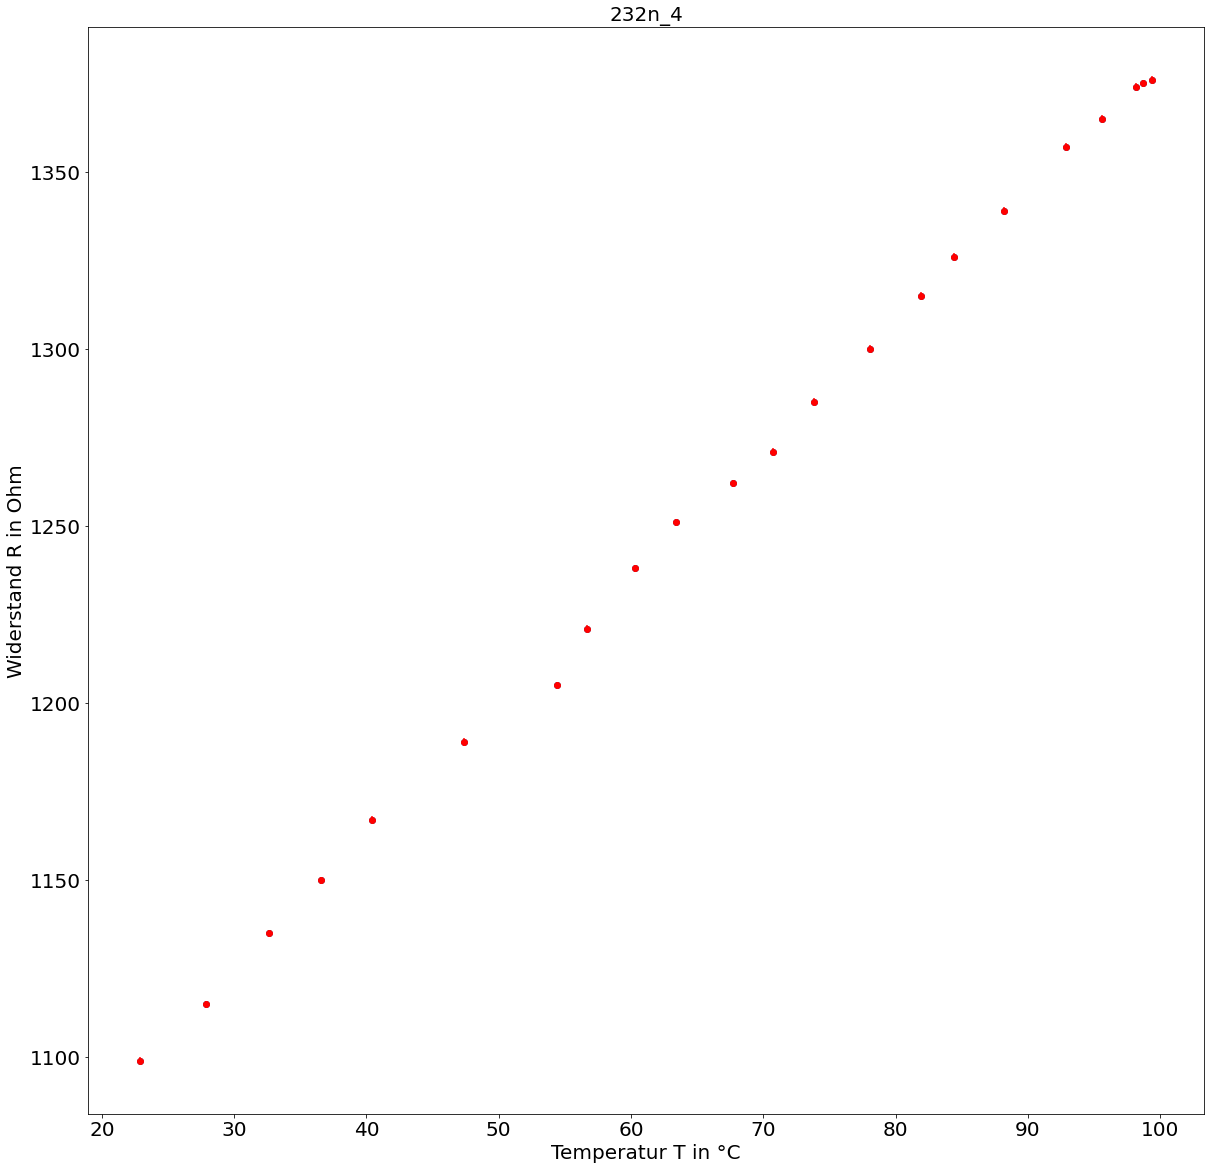

In [36]:

#Hier wird der Plot erstellt

from kafe2 import XYContainer, Fit, Plot
import matplotlib.pyplot as plt
import numpy as np

plt.rc ('font', size = 20) # steuert die Standardtextgröße
plt.rc ('axes', titlesize = 20) # Schriftgröße des Titels
plt.rc ('axes', labelsize = 20) # Schriftgröße der x- und y-Beschriftungen
plt.rc ('xtick', labelsize = 20) #Schriftgröße der x-Tick-Labels
plt.rc ('ytick', labelsize = 20) #Schriftgröße der y-Tick-Labels
plt.rc ('legend', fontsize = 20) #Schriftgröße der Legende

#Plot mir Fehlerbalken
plt.figure(figsize = (20,20)) #Größe des Bildes
plt.scatter(T_4, R_4) #eigentlicher Plot

plt.xlabel("Temperatur T in °C") #Achsenbeschriftung x-Achse
plt.ylabel("Widerstand R in Ohm") #Achsenbeschriftung y-Achse
plt.title("232n_4") #Titel des Plots
plt.errorbar(T_4, R_4, xerr = T_4_err, yerr = R_4_err, fmt = "o", color = "r") #Fehlerbalken, color r = Rot
plt.show #Plot anzeigen
plt.savefig('232n_4.jpg', dpi = 300) #Plot als jpg-Datei abspeichern

Anzahl der Wertepaare N: 22
Dies ist die Steigung m:  3.6564703019073512
Dies ist der y-Achsenabschnitt n:  1015.088382796909
Dies ist die Varianz auf m (V[m]):  0.00010852310706283451
Dies ist die Varianz auf n (V[n]):  0.548471146199173
Dies ist die Kovarianz von m und n (Vmn):  -0.007262169009904772
Wir erhalten die Güte als:  13.108864772483452


<Figure size 360x360 with 0 Axes>

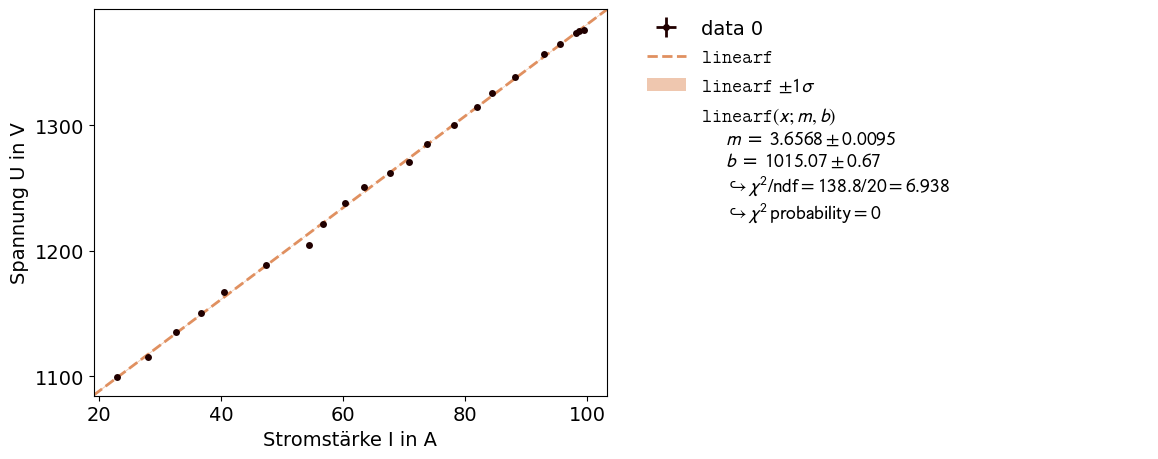

[[ 8.89018790e-05 -5.94713025e-03]
 [-5.94713025e-03  4.49362463e-01]]


In [37]:
x_data = T_4
#print("x_data:", x_data)
y_data = R_4
#print("y_data:", y_data)


#Fehler für den Fit
x_err = T_4_err
#print("x_err:", x_err)
y_err = R_4_err
#print("y_err:", y_err)


#Hier wird der Geraden-Fit berechneet und geplottet

from kafe2 import XYContainer, Fit, Plot
import matplotlib.pyplot as plt
import numpy as np

#N = Anzahl der Wertepaare
print("Anzahl der Wertepaare N:" , N)

#Umbenennen der Variablen
x = x_data
y = y_data
# Fehler x_err und y_err werden aus der vorherigen zelle übernommen

#Bildung der Varianzgewichteten Mittelwerte z ∈ {x, y, xy, x^2}

#Bildung von Zähler und Nenner der Rechnungen z/y_err**2
sumyerr  = sum(1/(y_err)**2)
#print("Dies ist der Nenner der Mittelwerte:", sumyerr)
xdivyerr = sum(x/(y_err)**2)
#print("Dies ist der Zähler des x-Mittelwert:", xdivyerr)
ydivyerr = sum(y/(y_err)**2)
#print("Dies ist der Zähler des y-Mittelwert:", ydivyerr)
x2divyerr = sum((x**2)/(y_err)**2)
#print("Dies ist der Zähler des x^2-Mittelwert:", x2divyerr)
xydivyerr = sum((x*y)/(y_err)**2)
#print("Dies ist der Zähler des xy-Mittelwert:", xydivyerr)

#Bildung der Varianzgewichteten Mittelwerte
xMittel = xdivyerr/sumyerr
#print("Dies ist der varianzgewichteter Mittelwert von X: ",xMittel)
yMittel = ydivyerr/sumyerr
#print("Dies ist der varianzgewichteter Mittelwert von Y: ",yMittel)
x2Mittel = x2divyerr/sumyerr
#print("Dies ist der Mittelwert von X^2: ",x2Mittel)
xyMittel = xydivyerr/sumyerr
#print("Dies ist der Mittelwert von XY: ",xyMittel)


#Berechnung von m und n:
m = (xyMittel-(xMittel*yMittel))/(x2Mittel-(xMittel)**2) #Steigung m
print("Dies ist die Steigung m: ",m)
n = yMittel - m*xMittel #Achsenabschnitt n
print("Dies ist der y-Achsenabschnitt n: ",n)

#Berechnung von den Varianzen:
sigmayMittel = N/sumyerr #Varianzgewichtete Standardabweichung Sigmay
#print("Dies ist die Varianzgemittelte Standardabweichung Sigmay: ", sigmayMittel)
Vm = sigmayMittel/(16*(x2Mittel-(xMittel)**2)) #Varianz der Steigung
print("Dies ist die Varianz auf m (V[m]): ",Vm)
Vn = x2Mittel*Vm #Varianz des Achsenabschnitt
print("Dies ist die Varianz auf n (V[n]): ",Vn)
Vmn = -Vm * xMittel #Kovarianz von m und n
print("Dies ist die Kovarianz von m und n (Vmn): ",Vmn)

#Berechnung der Güte:
xi2array = (y-m*x-n)**2/y_err #
xi2 = sum(xi2array)
#print("Dies ist der xi^2-Wert des Fits: ",xi2)
güte = xi2/(14-2) #Güte
print("Wir erhalten die Güte als: ", güte)


def linearf(x, m, b):#lineare Funktion definieren
    return m*x+b
def linfit(x_data, y_data, x_err, y_err): #funktion mit den daten als argumenten erstellen
    xy_data = XYContainer(x_data, y_data) # behälter für x und y erstellen
    
    xy_data.add_error(axis='x', err_val=x_err) #x-Fehlerbalken
    xy_data.add_error(axis='y', err_val=y_err) #y-Fehlerbalken
    xy_data.axis_labels = ("Stromstärke I in A", "Spannung U in V", "Stromstärke I in A")
    
    linear_fit = Fit(data=xy_data, model_function=linearf) #Objekt mit dem xy- Behälter und der linearen Funktion erzeugen
    fit_results = linear_fit.do_fit() #Ergebnisse bestimmen und später ausgeben lassen
    
    #linear_fit.report()
    
    plt.figure(figsize=(5,5)) #Größe des Bildes ändern
    plot = Plot(fit_objects=linear_fit) 
    plot.plot()
    
    #plot als jpg abspeichern und anzeigen
    plt.savefig('232n_4_fit.jpg', dpi = 500)
    plt.show() #Plot anzeigen
    return fit_results

#Ergebnisse in der Kovarianzmatrix ausgeben lassen
print(linfit(x_data, y_data, x_err, y_err)['parameter_cov_mat'])

In [38]:
#alpha berechnen

alpha = m/n
print("alpha:", alpha)

alpha_err = ((1/n*Vm)**2+(-m/n**2*Vn)**2)**(1/2)
print("Fehler auf alpha:", alpha_err)

alpha: 0.00360212013443849
Fehler auf alpha: 1.949226627945103e-06


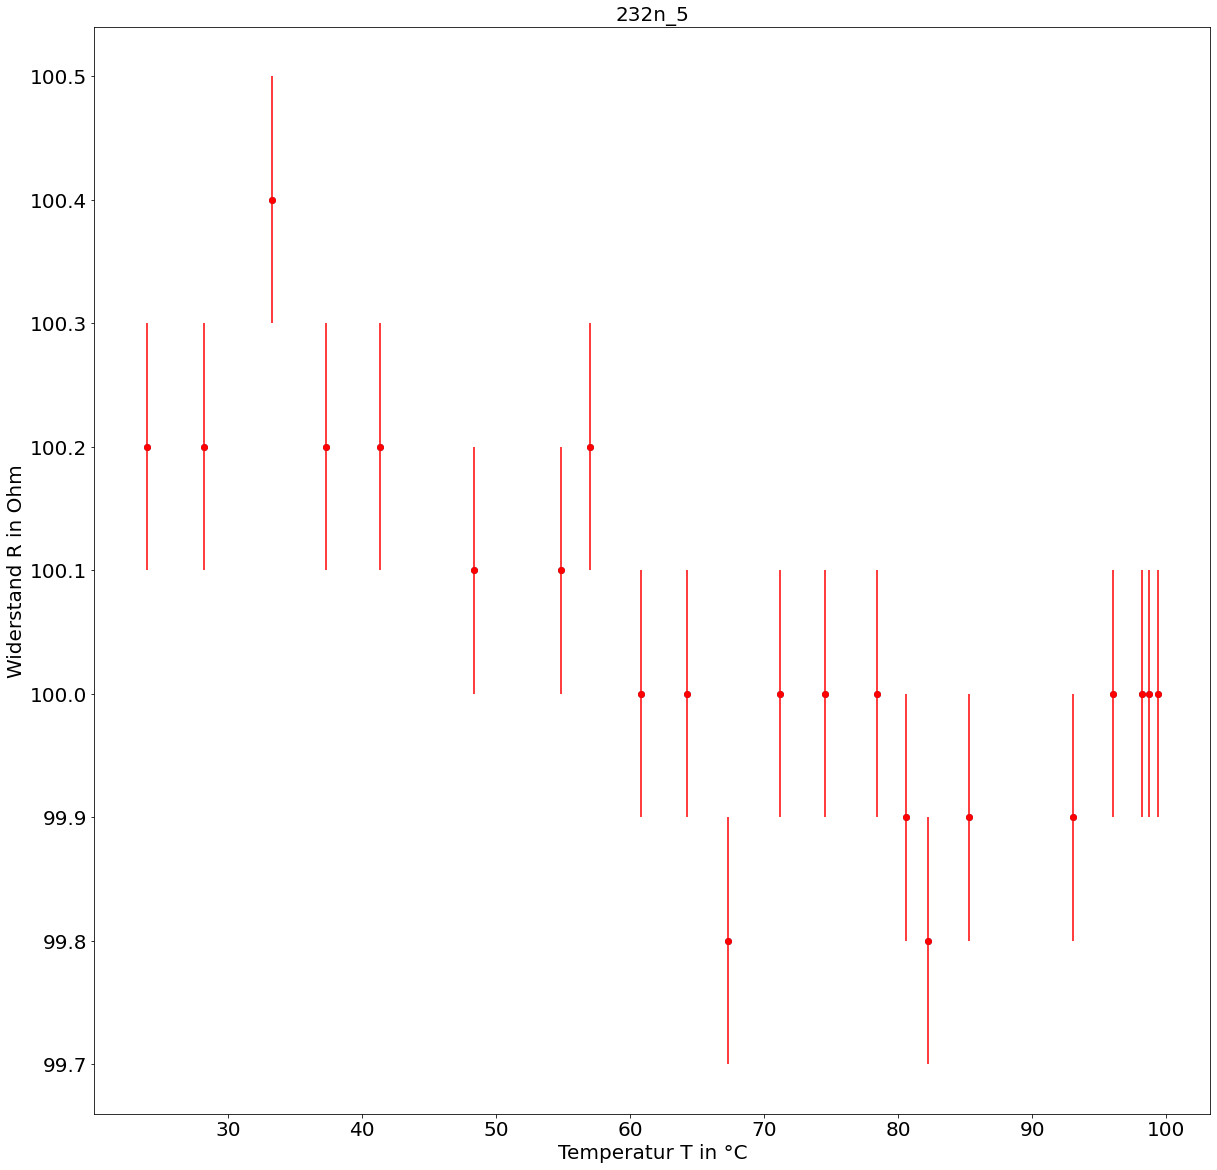

In [39]:

#Hier wird der Plot erstellt

from kafe2 import XYContainer, Fit, Plot
import matplotlib.pyplot as plt
import numpy as np

plt.rc ('font', size = 20) # steuert die Standardtextgröße
plt.rc ('axes', titlesize = 20) # Schriftgröße des Titels
plt.rc ('axes', labelsize = 20) # Schriftgröße der x- und y-Beschriftungen
plt.rc ('xtick', labelsize = 20) #Schriftgröße der x-Tick-Labels
plt.rc ('ytick', labelsize = 20) #Schriftgröße der y-Tick-Labels
plt.rc ('legend', fontsize = 20) #Schriftgröße der Legende

#Plot mir Fehlerbalken
plt.figure(figsize = (20,20)) #Größe des Bildes
plt.scatter(T_5, R_5) #eigentlicher Plot

plt.xlabel("Temperatur T in °C") #Achsenbeschriftung x-Achse
plt.ylabel("Widerstand R in Ohm") #Achsenbeschriftung y-Achse
plt.title("232n_5") #Titel des Plots
plt.errorbar(T_5, R_5, xerr = T_5_err, yerr = R_5_err, fmt = "o", color = "r") #Fehlerbalken, color r = Rot
plt.show #Plot anzeigen
plt.savefig('232n_5.jpg', dpi = 300) #Plot als jpg-Datei abspeichern

Anzahl der Wertepaare N: 22
Dies ist die Steigung m:  -0.004506457066833738
Dies ist der y-Achsenabschnitt n:  100.3428212304912
Dies ist die Varianz auf m (V[m]):  1.1283394137461725e-06
Dies ist die Varianz auf n (V[n]):  0.005689428390340085
Dies ist die Kovarianz von m und n (Vmn):  -7.559361190547653e-05
Wir erhalten die Güte als:  0.17142135964787766


<Figure size 360x360 with 0 Axes>

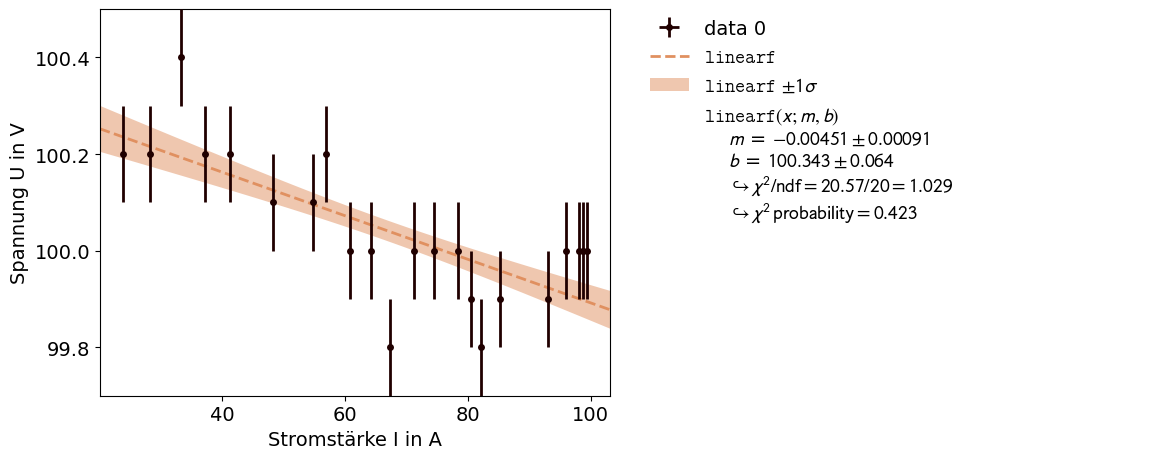

[[ 8.20667336e-07 -5.49809822e-05]
 [-5.49809822e-05  4.13803065e-03]]


In [40]:
x_data = T_5
#print("x_data:", x_data)
y_data = R_5
#print("y_data:", y_data)


#Fehler für den Fit
x_err = T_5_err
#print("x_err:", x_err)
y_err = R_5_err
#print("y_err:", y_err)


#Hier wird der Geraden-Fit berechneet und geplottet

from kafe2 import XYContainer, Fit, Plot
import matplotlib.pyplot as plt
import numpy as np

#N = Anzahl der Wertepaare
print("Anzahl der Wertepaare N:" , N)

#Umbenennen der Variablen
x = x_data
y = y_data
# Fehler x_err und y_err werden aus der vorherigen zelle übernommen

#Bildung der Varianzgewichteten Mittelwerte z ∈ {x, y, xy, x^2}

#Bildung von Zähler und Nenner der Rechnungen z/y_err**2
sumyerr  = sum(1/(y_err)**2)
#print("Dies ist der Nenner der Mittelwerte:", sumyerr)
xdivyerr = sum(x/(y_err)**2)
#print("Dies ist der Zähler des x-Mittelwert:", xdivyerr)
ydivyerr = sum(y/(y_err)**2)
#print("Dies ist der Zähler des y-Mittelwert:", ydivyerr)
x2divyerr = sum((x**2)/(y_err)**2)
#print("Dies ist der Zähler des x^2-Mittelwert:", x2divyerr)
xydivyerr = sum((x*y)/(y_err)**2)
#print("Dies ist der Zähler des xy-Mittelwert:", xydivyerr)

#Bildung der Varianzgewichteten Mittelwerte
xMittel = xdivyerr/sumyerr
#print("Dies ist der varianzgewichteter Mittelwert von X: ",xMittel)
yMittel = ydivyerr/sumyerr
#print("Dies ist der varianzgewichteter Mittelwert von Y: ",yMittel)
x2Mittel = x2divyerr/sumyerr
#print("Dies ist der Mittelwert von X^2: ",x2Mittel)
xyMittel = xydivyerr/sumyerr
#print("Dies ist der Mittelwert von XY: ",xyMittel)


#Berechnung von m und n:
m = (xyMittel-(xMittel*yMittel))/(x2Mittel-(xMittel)**2) #Steigung m
print("Dies ist die Steigung m: ",m)
n = yMittel - m*xMittel #Achsenabschnitt n
print("Dies ist der y-Achsenabschnitt n: ",n)

#Berechnung von den Varianzen:
sigmayMittel = N/sumyerr #Varianzgewichtete Standardabweichung Sigmay
#print("Dies ist die Varianzgemittelte Standardabweichung Sigmay: ", sigmayMittel)
Vm = sigmayMittel/(16*(x2Mittel-(xMittel)**2)) #Varianz der Steigung
print("Dies ist die Varianz auf m (V[m]): ",Vm)
Vn = x2Mittel*Vm #Varianz des Achsenabschnitt
print("Dies ist die Varianz auf n (V[n]): ",Vn)
Vmn = -Vm * xMittel #Kovarianz von m und n
print("Dies ist die Kovarianz von m und n (Vmn): ",Vmn)

#Berechnung der Güte:
xi2array = (y-m*x-n)**2/y_err #
xi2 = sum(xi2array)
#print("Dies ist der xi^2-Wert des Fits: ",xi2)
güte = xi2/(14-2) #Güte
print("Wir erhalten die Güte als: ", güte)


def linearf(x, m, b):#lineare Funktion definieren
    return m*x+b
def linfit(x_data, y_data, x_err, y_err): #funktion mit den daten als argumenten erstellen
    xy_data = XYContainer(x_data, y_data) # behälter für x und y erstellen
    
    xy_data.add_error(axis='x', err_val=x_err) #x-Fehlerbalken
    xy_data.add_error(axis='y', err_val=y_err) #y-Fehlerbalken
    xy_data.axis_labels = ("Stromstärke I in A", "Spannung U in V", "Stromstärke I in A")
    
    linear_fit = Fit(data=xy_data, model_function=linearf) #Objekt mit dem xy- Behälter und der linearen Funktion erzeugen
    fit_results = linear_fit.do_fit() #Ergebnisse bestimmen und später ausgeben lassen
    
    #linear_fit.report()
    
    plt.figure(figsize=(5,5)) #Größe des Bildes ändern
    plot = Plot(fit_objects=linear_fit) 
    plot.plot()
    
    #plot als jpg abspeichern und anzeigen
    plt.savefig('232n_5_fit.jpg', dpi = 500)
    plt.show() #Plot anzeigen
    return fit_results

#Ergebnisse in der Kovarianzmatrix ausgeben lassen
print(linfit(x_data, y_data, x_err, y_err)['parameter_cov_mat'])

In [41]:
#alpha berechnen

alpha = m/n
print("alpha:", alpha)

alpha_err = ((1/n*Vm)**2+(-m/n**2*Vn)**2)**(1/2)
print("Fehler auf alpha:", alpha_err)

alpha: -4.491060757084195e-05
Fehler auf alpha: 1.1529562758898548e-08
